# About News Classification Project Analysis - Part A 

***The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate or false information acquires a tremendous potential to cause real world impacts, within minutes, for millions of users. The main aim of News Classification is to analyze the Fake & Real News and build a model which can distinguish a Real News from a Fake one, using Natural Language Processing Techniques and Machine Learning Models.***

***Dataset contains 5 features and 44,921 records. All features are Categorical features. Data is only having used based news.***

***The dataset were cleaned, converted into lowercase, process of lemmatization were applied in order to avoid any irregularities in our model.***

***File includes all Data Cleaning, Data Visualization, and Predictive Modeling with required Data Visualization in their support.***

***Since we were using NLP techniques to achieve categorization of the text reviews, we used count vectorizer and TF- IDF techniques and analyzed the scores for each of the following. We performed K-Fold Analysis as well for each of the models in order to get better accuracy. Hence after vigorous analysis we decided to follow the TFIDF approach and conclude that Random Forest model is the best fit for our Fake News Classification***



## Import Libraries

In [152]:
#Download the nltk package for NLP.
import nltk # For natural language toolkit
from nltk.corpus import stopwords # For stopwords
from nltk.stem import WordNetLemmatizer # For word lemmatizer
from nltk.tokenize import word_tokenize # For word tokenization

import string#For String Manuplation
import time as t#For Time Calculation
import re # regular expression
import numpy as np #For Numerical Operations
import pandas as pd #For Table Manuplation
import seaborn as sns #For visualization
import matplotlib.pyplot as plt #For visualization
import scipy.stats as st

from warnings import filterwarnings #For filtering Warnings
filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression #For Logistic Regression Modelling
from sklearn.tree import DecisionTreeClassifier #For Decesion Tree Classifier Modelling
from sklearn.naive_bayes import MultinomialNB  #For Multinomial Bayes Modelling
from sklearn.neighbors import KNeighborsClassifier #For KNN Modelling
from sklearn.ensemble import RandomForestClassifier #For Random Forest Modelling
from sklearn.ensemble import AdaBoostClassifier #For Adaptive Boosting Modelling
from sklearn.ensemble import GradientBoostingClassifier #For Gradient Boost Modelling
from xgboost import XGBClassifier #For XGBoost Modelling

from sklearn.feature_extraction.text import CountVectorizer # For count vectorization
from sklearn.feature_extraction.text import TfidfVectorizer # For TFID vectorization
from sklearn.model_selection import train_test_split#For train_test_split
from sklearn.model_selection import cross_val_score#For Cross Validation
from sklearn.model_selection import StratifiedKFold#For Stratified K Fold

from sklearn import metrics #For Evaluation Metrics
from sklearn.metrics import classification_report #For Classification Report
from sklearn.metrics import cohen_kappa_score #For Evaluation of Kappa Score
from sklearn.metrics import confusion_matrix #For Evaluation of Confusion Matrix
from sklearn.metrics import roc_curve #For Evaluation of ROC_AUC Score
from sklearn.metrics import accuracy_score #For Evaluation of Accuracy Score


from wordcloud import WordCloud # For Wordcloud Visuallization

## Read Dataset

In [153]:
d_fake=pd.read_csv("Fake.csv") #Fake News Data
d_real=pd.read_csv("Real.csv") #Real News Data

In [154]:
d_fake['Fake/Real'] = 'Fake' #Target Variable 'Fake/Real' assign with Fake for Fake News.
d_real['Fake/Real'] = 'Real' #Target Variable 'Fake/Real' assign with Real for Real News.

d_news = pd.concat([d_fake,d_real],axis=0,ignore_index=True)

In [155]:
def Fake_Real(x):            #Function for mapping Fake with 0 and Real with 1
    if x=='Fake':
        return 0
    elif x=='Real':
        return 1
    
d_news['Fake/Real']=d_news['Fake/Real'].map(Fake_Real)


In [156]:
d_news.head(5)#Reading first 5 Outputs of the d_news

,title,text,subject,date,Fake/Real
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


### Null Values

In [157]:
#Exe
d_news.isnull().sum() #No null values in the Dataset

title        0
text         0
subject      0
date         0
Fake/Real    0
dtype: int64

###  Count of Target Feature

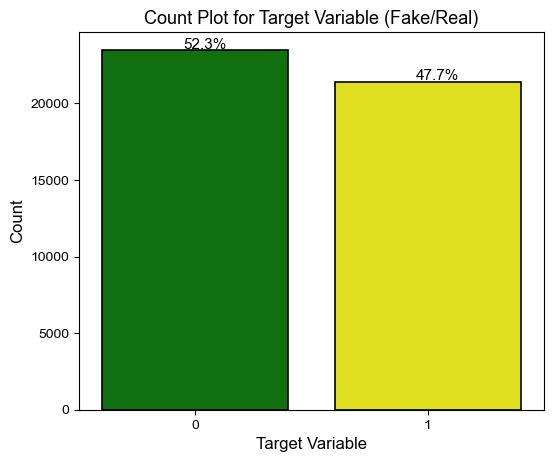

In [8]:
#Exe
plt.figure(figsize=(6,5),dpi=100)
sns.countplot(x='Fake/Real',data=d_news,palette=['green','yellow'],linewidth=1.2,edgecolor='black')

plt.text(x = -0.05, y = d_news['Fake/Real'].value_counts()[0] + 100, 
         s = str(round((d_news['Fake/Real'].value_counts()[0])*100/len(d_news),2)) + '%',fontsize=11,)

plt.text(x = 0.95, y = d_news['Fake/Real'].value_counts()[1] +100, 
         s = str(round((d_news['Fake/Real'].value_counts()[1])*100/len(d_news),2)) + '%',fontsize=11)

plt.title('Count Plot for Target Variable (Fake/Real)', fontsize = 13)
plt.xlabel('Target Variable', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

sns.set_style('dark')
plt.show()

### Removing Duplicates

In [158]:
#Exe
d_news.shape

(44898, 5)

In [159]:
# Checking if any duplicate records are present
duplicate=d_news[d_news.duplicated()] 
duplicate.shape

(209, 5)

In [160]:
# Removing duplicate records
d_news.drop_duplicates(inplace=True)

In [161]:
d_news.shape

(44689, 5)

### Shuffling the Data

In [446]:
d_news = d_news.sample(frac = 1,random_state=590)# for shuffling the rows in data frame
d_news.head()

,level_0,index,Fake/Real
37508,9629,40833,1
18147,36762,2791,1
38109,9110,4872,1
11039,22015,44107,0
40345,9042,25895,0


### Word Cloud Graph

- Real News

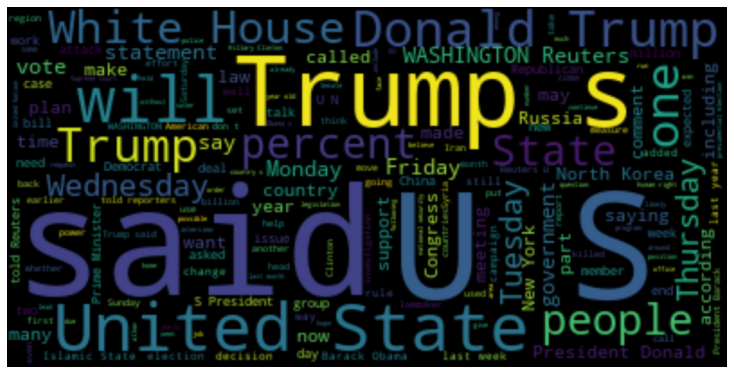

In [13]:
cloud = WordCloud(max_words = 500, background_color = "black").generate(" ".join(d_news[d_news['Fake/Real'] == 1].text))
plt.figure(figsize=(10, 8))
plt.imshow(cloud, interpolation="gaussian")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

- Fake News

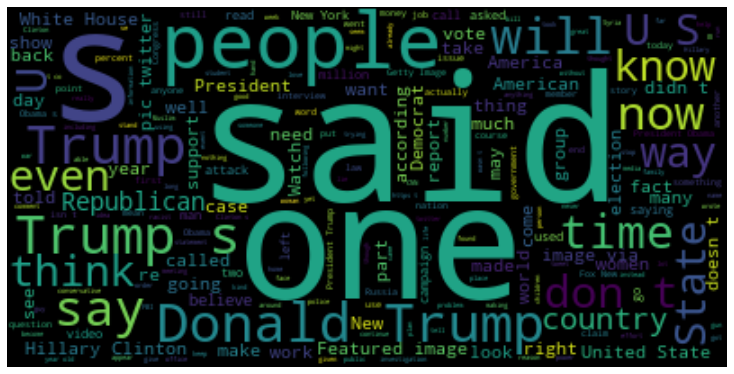

In [14]:
cloud = WordCloud(max_words = 1000, background_color = "black").generate(" ".join(d_news[d_news['Fake/Real'] == 0].text))
plt.figure(figsize=(10, 8))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Text Preprocessing

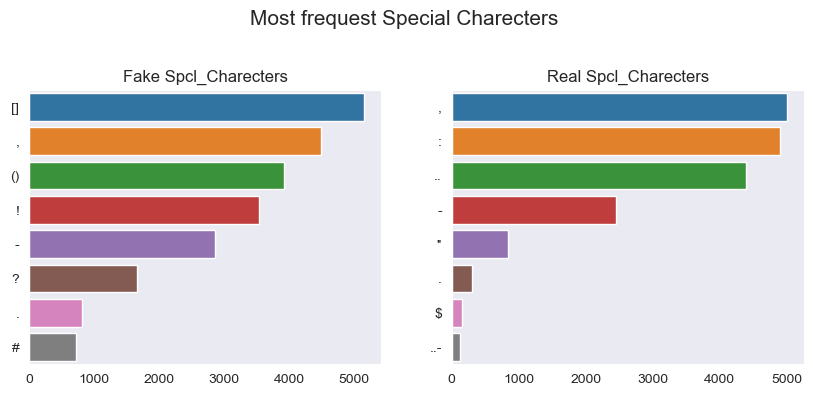

In [15]:
punctuation_list=list(string.punctuation)
def spcl_chars(sentence):
    empty = ''
    for s in sentence:
        if s in punctuation_list:
            empty = empty+s
    return empty
Fake_spcl=[spcl_chars(x) for x in ' '.join([i for i in d_news[d_news['Fake/Real']==0]['title'] ]).split()  ]
Real_spcl=[spcl_chars(x) for x in ' '.join([i for i in d_news[d_news['Fake/Real']==1]['title'] ]).split() ]

plt.figure(figsize=(10,8),dpi=100)
ax=plt.subplot2grid((2,2),(0,0))
d=pd.Series(Fake_spcl).value_counts()[2:10]
sns.barplot(y=d.index,x=d,orient='h')
plt.title("Fake Spcl_Charecters")

ax=plt.subplot2grid((2,2),(0,1))
o=pd.Series(Real_spcl).value_counts()[2:10]
sns.barplot(y=o.index,x=o,orient='h')
plt.title("Real Spcl_Charecters")
sns.set_style('dark')
plt.suptitle("Most frequest Special Charecters",fontsize=15)
plt.show()

In [162]:
#Exe
def removespcl(text):
    
    #removing special characters (eg. punctuations)
    
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)
    
    #removing numbers
    
    text = re.sub(r'\[[0-9]*\]',' ',text)
    
    #converting to lower case
    
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    
    return text

d_news['title'] = d_news['title'].apply(removespcl)
d_news['text'] = d_news['text'].apply(removespcl)
d_news.head()

,title,text,subject,date,Fake/Real
0,donald trump sends out embarrassing new years ...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",0
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0
2,sheriff david clarke becomes an internet joke ...,on friday it was revealed that former milwauke...,News,"December 30, 2017",0
3,trump is so obsessed he even has obamas name c...,on christmas day donald trump announced that h...,News,"December 29, 2017",0
4,pope francis just called out donald trump duri...,pope francis used his annual christmas day mes...,News,"December 25, 2017",0


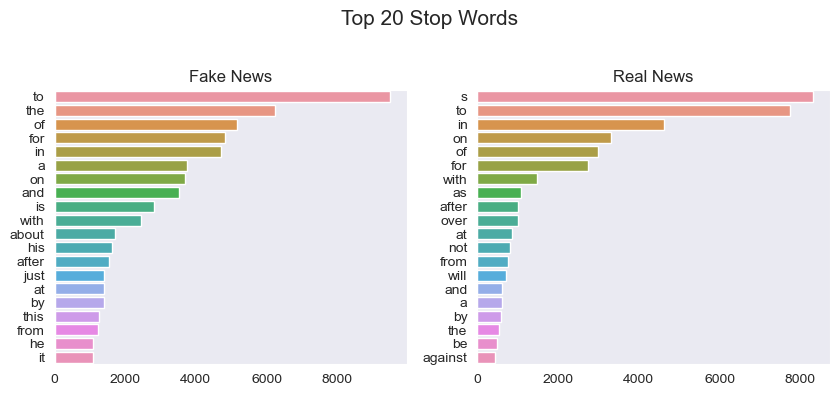

In [17]:
Fake_stop=[x for x in ' '.join([i for i in d_news[d_news['Fake/Real']==0]['title'] ]).split() if x  in stopwords.words('english')]
Real_stop=[x for x in ' '.join([i for i in d_news[d_news['Fake/Real']==1]['title'] ]).split() if x  in stopwords.words('english')]

plt.figure(figsize=(10,8),dpi=100)
ax=plt.subplot2grid((2,2),(0,0))
d=pd.Series(Fake_stop).value_counts()[:20]
sns.barplot(y=d.index,x=d,orient='h')
plt.title("Fake News")

ax=plt.subplot2grid((2,2),(0,1))
o=pd.Series(Real_stop).value_counts()[:20]
sns.barplot(y=o.index,x=o,orient='h')
plt.title("Real News")
plt.suptitle("Top 20 Stop Words",fontsize=15)
plt.show()

### Tokenization

In [163]:
d_news['title']= d_news['title'].apply(lambda x: word_tokenize(x))
d_news['text']= d_news['text'].apply(lambda x: word_tokenize(x))
d_news.head()

,title,text,subject,date,Fake/Real
0,"[donald, trump, sends, out, embarrassing, new,...","[donald, trump, just, couldn, t, wish, all, am...",News,"December 31, 2017",0
1,"[drunk, bragging, trump, staffer, started, rus...","[house, intelligence, committee, chairman, dev...",News,"December 31, 2017",0
2,"[sheriff, david, clarke, becomes, an, internet...","[on, friday, it, was, revealed, that, former, ...",News,"December 30, 2017",0
3,"[trump, is, so, obsessed, he, even, has, obama...","[on, christmas, day, donald, trump, announced,...",News,"December 29, 2017",0
4,"[pope, francis, just, called, out, donald, tru...","[pope, francis, used, his, annual, christmas, ...",News,"December 25, 2017",0


### Removing Stop words

In [164]:
#removing stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [165]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [166]:
d_news['title'] = d_news['title'].apply(remove_stopwords)
d_news['text'] = d_news['text'].apply(remove_stopwords)
d_news.head()

,title,text,subject,date,Fake/Real
0,"[donald, trump, sends, embarrassing, new, year...","[donald, trump, wish, americans, happy, new, y...",News,"December 31, 2017",0
1,"[drunk, bragging, trump, staffer, started, rus...","[house, intelligence, committee, chairman, dev...",News,"December 31, 2017",0
2,"[sheriff, david, clarke, becomes, internet, jo...","[friday, revealed, former, milwaukee, sheriff,...",News,"December 30, 2017",0
3,"[trump, obsessed, even, obamas, name, coded, w...","[christmas, day, donald, trump, announced, wou...",News,"December 29, 2017",0
4,"[pope, francis, called, donald, trump, christm...","[pope, francis, used, annual, christmas, day, ...",News,"December 25, 2017",0


### Lemmatization

In [167]:
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [168]:
def lemmatizer(word):
    lemm_text = [wordnet_lemmatizer.lemmatize(x,pos='v') if x != wordnet_lemmatizer.lemmatize(x,pos='v')
                 else wordnet_lemmatizer.lemmatize(x,pos='a') for x in word]
    return lemm_text

d_news['title'] = d_news['title'].apply(lambda x: lemmatizer(x))
d_news['text'] = d_news['text'].apply(lambda x: lemmatizer(x))
d_news.head()

,title,text,subject,date,Fake/Real
0,"[donald, trump, send, embarrass, new, years, e...","[donald, trump, wish, americans, happy, new, y...",News,"December 31, 2017",0
1,"[drink, brag, trump, staffer, start, russian, ...","[house, intelligence, committee, chairman, dev...",News,"December 31, 2017",0
2,"[sheriff, david, clarke, become, internet, jok...","[friday, reveal, former, milwaukee, sheriff, d...",News,"December 30, 2017",0
3,"[trump, obsess, even, obamas, name, cod, websi...","[christmas, day, donald, trump, announce, woul...",News,"December 29, 2017",0
4,"[pope, francis, call, donald, trump, christmas...","[pope, francis, use, annual, christmas, day, m...",News,"December 25, 2017",0


In [169]:
#converting list to string on each cell

def convert (i):
    s = ' '.join(i)
    return s

d_news['title'] = d_news['title'].apply(convert)
d_news['text'] = d_news['text'].apply(convert)
d_news.head()

,title,text,subject,date,Fake/Real
0,donald trump send embarrass new years eve mess...,donald trump wish americans happy new year lea...,News,"December 31, 2017",0
1,drink brag trump staffer start russian collusi...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0
2,sheriff david clarke become internet joke thre...,friday reveal former milwaukee sheriff david c...,News,"December 30, 2017",0
3,trump obsess even obamas name cod website image,christmas day donald trump announce would back...,News,"December 29, 2017",0
4,pope francis call donald trump christmas speech,pope francis use annual christmas day message ...,News,"December 25, 2017",0


### Count Vectorization

In [19]:
#Vectorisation for Title column
coun_vect = CountVectorizer(max_features=3000)
count_matrix = coun_vect.fit_transform(d_news['title'])
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
print(df)
   

       abandon  abbas  abc  abe  able  abortion  abortions  abroad  absolute  \
0            0      0    0    0     0         0          0       0         0   
1            0      0    0    0     0         0          0       0         0   
2            0      0    0    0     0         0          0       0         0   
3            0      0    0    0     0         0          0       0         0   
4            0      0    0    0     0         0          0       0         0   
...        ...    ...  ...  ...   ...       ...        ...     ...       ...   
44684        0      0    0    0     0         0          0       0         0   
44685        0      0    0    0     0         0          0       0         0   
44686        0      0    0    0     0         0          0       0         0   
44687        0      0    0    0     0         0          0       0         0   
44688        0      0    0    0     0         0          0       0         0   

       absolutely  ...  youth  youve  y

In [304]:
#Vectorisation for text column
coun_vect = CountVectorizer(max_features=3000)
count_matrix = coun_vect.fit_transform(d_news['text'])
count_array1 = count_matrix.toarray()
df_count = pd.DataFrame(data=count_array1,columns = coun_vect.get_feature_names())
print(df_count)

       abandon  abc  abe  abedin  ability  able  abortion  abroad  absolutely  \
0            0    0    0       0        0     0         0       0           0   
1            0    0    0       0        0     0         0       0           0   
2            0    0    0       0        0     0         0       0           0   
3            0    0    0       0        0     0         0       0           0   
4            0    0    0       0        0     0         0       0           0   
...        ...  ...  ...     ...      ...   ...       ...     ...         ...   
44684        0    0    0       0        0     0         0       0           0   
44685        0    0    0       0        0     0         0       0           0   
44686        1    0    0       0        0     0         0       0           0   
44687        0    0    0       0        0     0         0       0           0   
44688        0    0    0       0        0     0         0       0           0   

       abuse  ...  york  yo

### TFID Vectorization

In [124]:
tfid_vec =  TfidfVectorizer

In [125]:
tfid_vec =  TfidfVectorizer()# 
count_matrix = tfid_vec.fit_transform(d_news['title'])
count_arrayTF = count_matrix.toarray()
df = pd.DataFrame(data=count_arrayTF,columns = tfid_vec.get_feature_names())
print(df)

        aa  aar  aardvark  aaron  aarp  abadi  abandon  abbas  abbott  abc  \
0      0.0  0.0       0.0    0.0   0.0    0.0      0.0    0.0     0.0  0.0   
1      0.0  0.0       0.0    0.0   0.0    0.0      0.0    0.0     0.0  0.0   
2      0.0  0.0       0.0    0.0   0.0    0.0      0.0    0.0     0.0  0.0   
3      0.0  0.0       0.0    0.0   0.0    0.0      0.0    0.0     0.0  0.0   
4      0.0  0.0       0.0    0.0   0.0    0.0      0.0    0.0     0.0  0.0   
...    ...  ...       ...    ...   ...    ...      ...    ...     ...  ...   
44684  0.0  0.0       0.0    0.0   0.0    0.0      0.0    0.0     0.0  0.0   
44685  0.0  0.0       0.0    0.0   0.0    0.0      0.0    0.0     0.0  0.0   
44686  0.0  0.0       0.0    0.0   0.0    0.0      0.0    0.0     0.0  0.0   
44687  0.0  0.0       0.0    0.0   0.0    0.0      0.0    0.0     0.0  0.0   
44688  0.0  0.0       0.0    0.0   0.0    0.0      0.0    0.0     0.0  0.0   

       ...   zs  zschaepe  zucker  zuckerberg  zuckerbergs  zul

In [196]:
tfid_vec =  TfidfVectorizer(max_features=3000)
count_matrix = tfid_vec.fit_transform(d_news['text'])
count_arrayTF1 = count_matrix.toarray()
df_text_tfid= pd.DataFrame(data=count_arrayTF1,columns = tfid_vec.get_feature_names())
print(count_matrix)


  (0, 1302)	0.026066338406423688
  (0, 1146)	0.03554403900658022
  (0, 126)	0.05184618959444796
  (0, 1971)	0.04474090375759902
  (0, 1662)	0.038641647805287165
  (0, 2978)	0.04114863197647139
  (0, 2028)	0.031585105738360264
  (0, 1145)	0.021585114326364934
  (0, 419)	0.05965576961999301
  (0, 2721)	0.02486463398399155
  (0, 1257)	0.0577494792832617
  (0, 2894)	0.027585623900602763
  (0, 1848)	0.09562517363587808
  (0, 1113)	0.06143260262374234
  (0, 2697)	0.034103849152255734
  (0, 150)	0.05394294126893039
  (0, 2333)	0.06137145914388298
  (0, 326)	0.03472143878781674
  (0, 1508)	0.022250224394237027
  (0, 751)	0.052516887461959934
  (0, 111)	0.03991959890786273
  (0, 2575)	0.0568217820039059
  (0, 257)	0.02867077775016139
  (0, 2968)	0.024226405735160227
  (0, 2043)	0.027452812011956217
  :	:
  (44688, 739)	0.07017581842902357
  (44688, 990)	0.05523059768006189
  (44688, 1079)	0.053331433340419294
  (44688, 1778)	0.08718019132372874
  (44688, 713)	0.07961105545780608
  (44688, 1878)

### Model Building

**Logistic Regression**

**- TFID Model**

In [30]:
X = count_arrayTF1

In [31]:
y = d_news['Fake/Real']

In [32]:
logisticRegr = LogisticRegression()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (35751, 3000)
X_test: (8938, 3000)
y_train: (35751,)
y_test: (8938,)


In [34]:
skf = StratifiedKFold(n_splits=5)

lg_tfid = list(cross_val_score(logisticRegr, X_train, y_train, cv=skf, scoring ='accuracy'))

mean_cv_score = np.mean(lg_tfid)
lg_tfid.append(mean_cv_score)


In [35]:
lg_tfid_cv=pd.DataFrame(data=[lg_tfid],
                        columns=['CV_1','CV_2','CV_3','CV_4','CV_5','Average Score'],
                        index=['Logistic_Regression_TFIDF'])

lg_tfid_cv

,CV_1,CV_2,CV_3,CV_4,CV_5,Average Score
Logistic_Regression_TFIDF,0.986855,0.988531,0.987273,0.987133,0.987413,0.987441


In [36]:
start_time = t.time()

model_tfid_lr = logisticRegr.fit(X_train, y_train)
model_tfid_lr

end_time=t.time()

In [37]:
lr_tfid_time=end_time-start_time
lr_tfid_exe=pd.DataFrame(data=lr_tfid_time,columns=['Training_Time ( in seconds)'],index=['Logistic_Regression_TFIDF'])
lr_tfid_exe

,Training_Time ( in seconds)
Logistic_Regression_TFIDF,11.402017


In [38]:
start_time = t.time()

ytest_pred = model_tfid_lr.predict(X_test)

ytrain_pred = model_tfid_lr.predict(X_train)

end_time=t.time()

In [39]:
lr_tfid_ptime=end_time-start_time
lr_tfid_pre=pd.DataFrame(data=lr_tfid_ptime,columns=['Prediction_Time ( in seconds)'],index=['Logistic_Regression_TFIDF'])
lr_tfid_pre

,Prediction_Time ( in seconds)
Logistic_Regression_TFIDF,0.620001


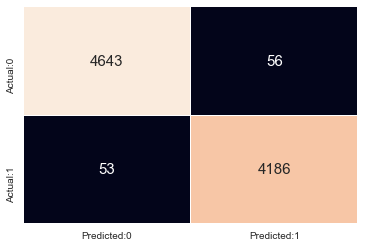

In [40]:
cm = confusion_matrix(y_test, ytest_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})


plt.xticks(fontsize = 10)


plt.yticks(fontsize = 10)


plt.show()

In [41]:
ytest_pred_prob=model_tfid_lr.predict_proba(X_test)

ytrain_pred_prob=model_tfid_lr.predict_proba(X_train)

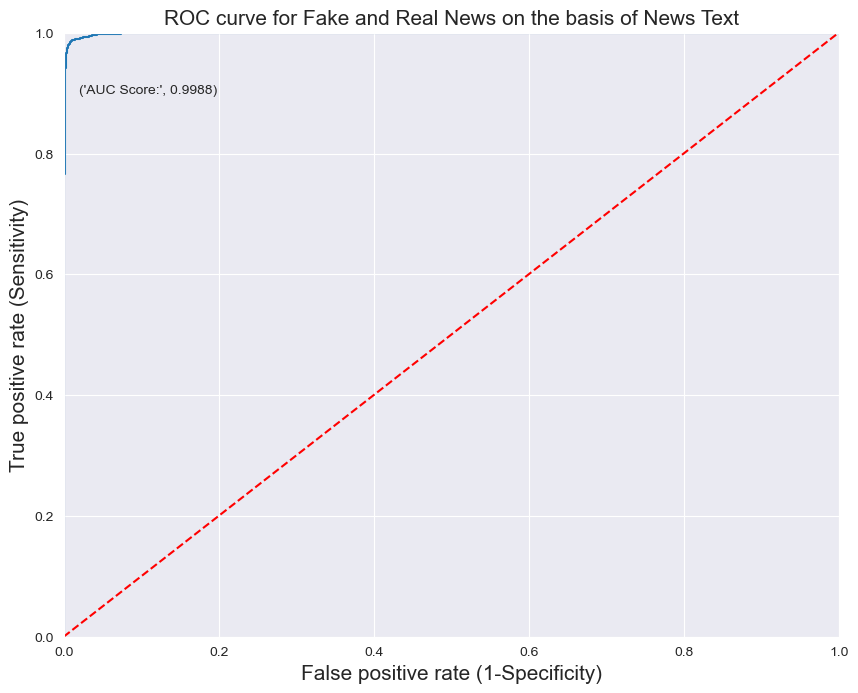

In [42]:
plt.figure(figsize=(10,8),dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred_prob[:,1])
plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for Fake and Real News on the basis of News Text', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),4)))
                               

plt.grid(True)

In [43]:
lr_tfid_test=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_test, ytest_pred),
               'Recall Score': metrics.recall_score(y_test, ytest_pred),
               'Accuracy Score': metrics.accuracy_score(y_test, ytest_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_test, ytest_pred),
               'f1-score': metrics.f1_score(y_test, ytest_pred)},index=['Test'])

lr_tfid_test

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Test,0.998843,0.986799,0.987497,0.987805,0.975546,0.987148


In [44]:
lr_tfid_train=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_train, ytrain_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_train, ytrain_pred),
               'Recall Score': metrics.recall_score(y_train, ytrain_pred),
               'Accuracy Score': metrics.accuracy_score(y_train, ytrain_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_train, ytrain_pred),
               'f1-score': metrics.f1_score(y_train, ytrain_pred)},index=['Train'])
lr_tfid_train

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Train,0.999347,0.989486,0.992576,0.991469,0.982896,0.991029


**- Count Vectorization Model**

In [45]:
X = count_array1

In [46]:
y = d_news['Fake/Real']

In [47]:
logisticRegr = LogisticRegression()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (35751, 3000)
X_test: (8938, 3000)
y_train: (35751,)
y_test: (8938,)


In [49]:
skf = StratifiedKFold(n_splits=5)

lg_count = list(cross_val_score(logisticRegr, X_train, y_train, cv=skf, scoring ='accuracy'))

mean_cv_score = np.mean(lg_count)
lg_count.append(mean_cv_score)

In [50]:
lg_count_cv=pd.DataFrame(data=[lg_count],
                        columns=['CV_1','CV_2','CV_3','CV_4','CV_5','Average Score'],
                        index=['Logistic_Regression_CV'])

lg_count_cv

,CV_1,CV_2,CV_3,CV_4,CV_5,Average Score
Logistic_Regression_CV,0.994686,0.996503,0.994126,0.994545,0.995105,0.994993


In [51]:
start_time =t.time()

model_count_lr = logisticRegr.fit(X_train, y_train)
model_count_lr

end_time=t.time()

In [52]:
lr_count_time=end_time-start_time
lr_count_exe=pd.DataFrame(data=lr_count_time,columns=['Training_Time ( in seconds)'],index=['Logistic_Regression_CV'])
lr_count_exe

,Training_Time ( in seconds)
Logistic_Regression_CV,20.658034


In [53]:
start_time =t.time()

ytest_pred = model_count_lr.predict(X_test)

ytrain_pred = model_count_lr.predict(X_train)

end_time=t.time()

In [54]:
lr_count_ptime=end_time-start_time
lr_count_pre=pd.DataFrame(data=lr_count_ptime,columns=['Prediction_Time ( in seconds)'],index=['Logistic_Regression_CV'])
lr_count_pre

,Prediction_Time ( in seconds)
Logistic_Regression_CV,0.840001


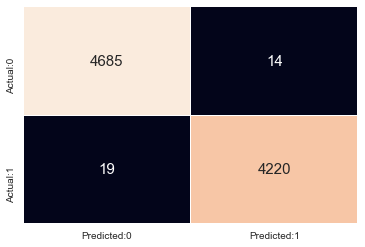

In [55]:
cm = confusion_matrix(y_test, ytest_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})


plt.xticks(fontsize = 10)


plt.yticks(fontsize = 10)


plt.show()

In [56]:
ytest_pred_prob=model_count_lr.predict_proba(X_test)

ytrain_pred_prob=model_count_lr.predict_proba(X_train)

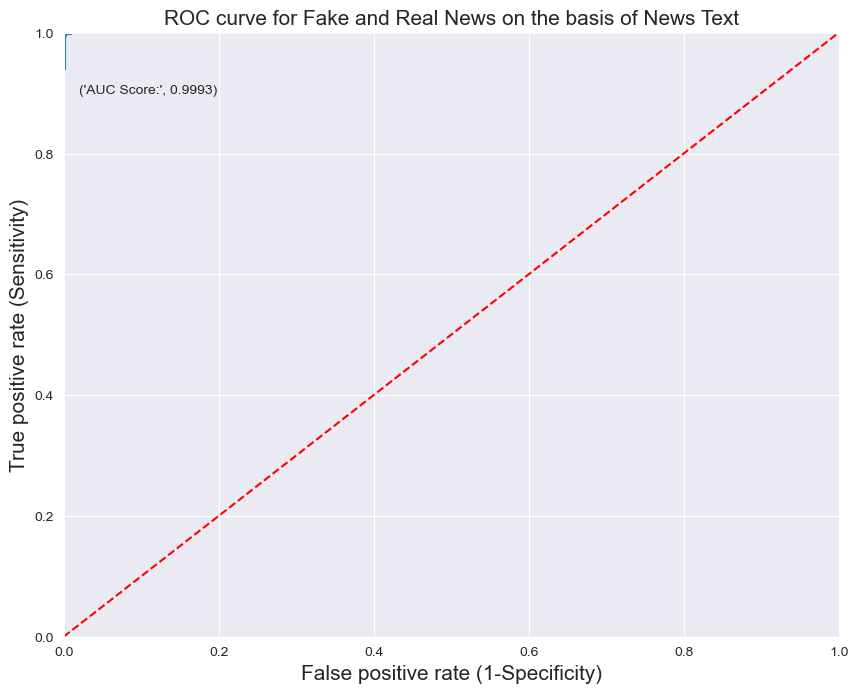

In [57]:
plt.figure(figsize=(10,8),dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred_prob[:,1])
plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for Fake and Real News on the basis of News Text', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),4)))
                               

plt.grid(True)

In [58]:
lr_count_test=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_test, ytest_pred),
               'Recall Score': metrics.recall_score(y_test, ytest_pred),
               'Accuracy Score': metrics.accuracy_score(y_test, ytest_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_test, ytest_pred),
               'f1-score': metrics.f1_score(y_test, ytest_pred)},index=['Test'])
lr_count_test

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Test,0.999262,0.996693,0.995518,0.996308,0.992596,0.996105


In [59]:
lr_count_train=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_train, ytrain_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_train, ytrain_pred),
               'Recall Score': metrics.recall_score(y_train, ytrain_pred),
               'Accuracy Score': metrics.accuracy_score(y_train, ytrain_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_train, ytrain_pred),
               'f1-score': metrics.f1_score(y_train, ytrain_pred)},index=['Train'])
lr_count_train

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Train,0.999998,1.0,0.999941,0.999972,0.999944,0.999971


### Decesion Tree

**- TFID Model**

In [60]:
X = count_arrayTF1

In [61]:
y = d_news['Fake/Real']

In [62]:
decisionTree = DecisionTreeClassifier()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (35751, 3000)
X_test: (8938, 3000)
y_train: (35751,)
y_test: (8938,)


In [64]:
skf = StratifiedKFold(n_splits=5)

dt_tfid = list(cross_val_score(decisionTree, X_train, y_train, cv=skf, scoring ='accuracy'))

mean_cv_score = np.mean(dt_tfid)
dt_tfid.append(mean_cv_score)

In [65]:
dt_tfid_cv=pd.DataFrame(data=[dt_tfid],
                        columns=['CV_1','CV_2','CV_3','CV_4','CV_5','Average Score'],
                        index=['Decesion_Tree_TFIDF'])

dt_tfid_cv

,CV_1,CV_2,CV_3,CV_4,CV_5,Average Score
Decesion_Tree_TFIDF,0.995805,0.995804,0.993846,0.995245,0.996084,0.995357


In [66]:
start_time =t.time()

model_tfid_dt = decisionTree.fit(X_train, y_train)
model_tfid_dt

end_time=t.time()

In [67]:
dt_tfid_time=end_time-start_time
dt_tfid_exe=pd.DataFrame(data=dt_tfid_time,columns=['Training_Time ( in seconds)'],index=['Decession_Tree_TFIDF'])
dt_tfid_exe

,Training_Time ( in seconds)
Decession_Tree_TFIDF,116.211163


In [68]:
start_time =t.time()

ytest_pred = model_tfid_dt.predict(X_test)

ytrain_pred = model_tfid_dt.predict(X_train)

end_time=t.time()

In [69]:
dt_tfid_ptime=end_time-start_time
dt_tfid_pre=pd.DataFrame(data=dt_tfid_ptime,columns=['Prediction_Time ( in seconds)'],index=['Decession_Tree_TFIDF'])
dt_tfid_pre

,Prediction_Time ( in seconds)
Decession_Tree_TFIDF,0.580001


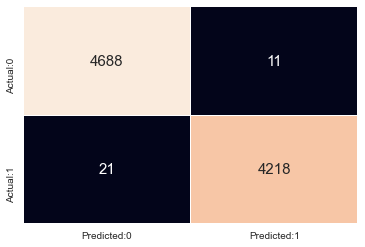

In [70]:
cm = confusion_matrix(y_test, ytest_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})


plt.xticks(fontsize = 10)


plt.yticks(fontsize = 10)


plt.show()

In [71]:
ytest_pred_prob=model_tfid_dt.predict_proba(X_test)

ytrain_pred_prob=model_tfid_dt.predict_proba(X_train)


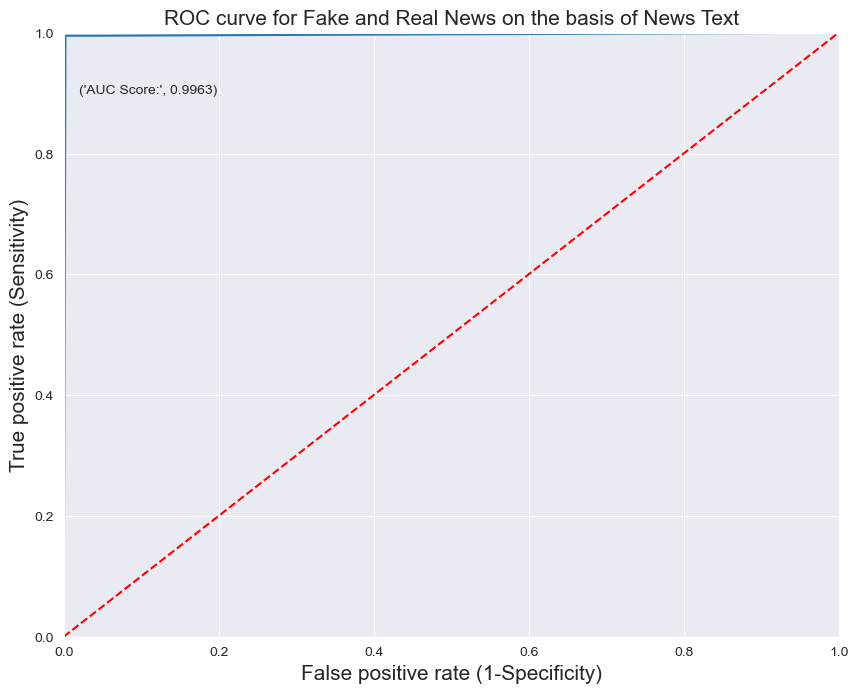

In [72]:
plt.figure(figsize=(10,8),dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred_prob[:,1])
plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for Fake and Real News on the basis of News Text', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),4)))
                               

plt.grid(True)

In [73]:
dt_tfid_test=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_test, ytest_pred),
               'Recall Score': metrics.recall_score(y_test, ytest_pred),
               'Accuracy Score': metrics.accuracy_score(y_test, ytest_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_test, ytest_pred),
               'f1-score': metrics.f1_score(y_test, ytest_pred)},index=['Test'])
dt_tfid_test

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Test,0.99627,0.997399,0.995046,0.99642,0.99282,0.996221


In [74]:
dt_tfid_train=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_train, ytrain_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_train, ytrain_pred),
               'Recall Score': metrics.recall_score(y_train, ytrain_pred),
               'Accuracy Score': metrics.accuracy_score(y_train, ytrain_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_train, ytrain_pred),
               'f1-score': metrics.f1_score(y_train, ytrain_pred)},index=['Train'])
dt_tfid_train

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Train,0.999999,1.0,0.999941,0.999972,0.999944,0.999971


**- Count Vectorization Model**

In [75]:
X=count_array1

In [76]:
y = d_news['Fake/Real']

In [77]:
decisionTree = DecisionTreeClassifier()

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (35751, 3000)
X_test: (8938, 3000)
y_train: (35751,)
y_test: (8938,)


In [79]:
skf = StratifiedKFold(n_splits=5)

dt_count = list(cross_val_score(decisionTree, X_train, y_train, cv=skf, scoring ='accuracy'))

mean_cv_score = np.mean(dt_count)
dt_count.append(mean_cv_score)

In [80]:
dt_count_cv=pd.DataFrame(data=[dt_count],
                        columns=['CV_1','CV_2','CV_3','CV_4','CV_5','Average Score'],
                        index=['Decesion_Tree_CV'])

dt_count_cv

,CV_1,CV_2,CV_3,CV_4,CV_5,Average Score
Decesion_Tree_CV,0.993427,0.996503,0.993986,0.995804,0.995664,0.995077


In [81]:
start_time =t.time()

model_count_dt = decisionTree.fit(X_train, y_train)
model_count_dt

end_time=t.time()

In [82]:
dt_count_time=end_time-start_time
dt_count_exe=pd.DataFrame(data=dt_count_time,columns=['Training_Time ( in seconds)'],index=['Decession_Tree_CV'])
dt_count_exe

,Training_Time ( in seconds)
Decession_Tree_CV,100.10014


In [83]:
start_time =t.time()

ytest_pred = model_count_dt.predict(X_test)

ytrain_pred = model_count_dt.predict(X_train)

end_time=t.time()

In [84]:
dt_count_ptime=end_time-start_time
dt_count_pre=pd.DataFrame(data=dt_count_ptime,columns=['Prediction_Time ( in seconds)'],index=['Decession_Tree_CV'])
dt_count_pre

,Prediction_Time ( in seconds)
Decession_Tree_CV,0.680001


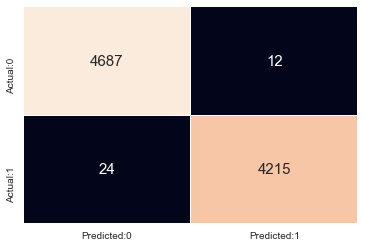

In [85]:
cm = confusion_matrix(y_test, ytest_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})


plt.xticks(fontsize = 10)


plt.yticks(fontsize = 10)


plt.show()

In [86]:
ytest_pred_prob=model_count_dt.predict_proba(X_test)

ytrain_pred_prob=model_count_dt.predict_proba(X_train)

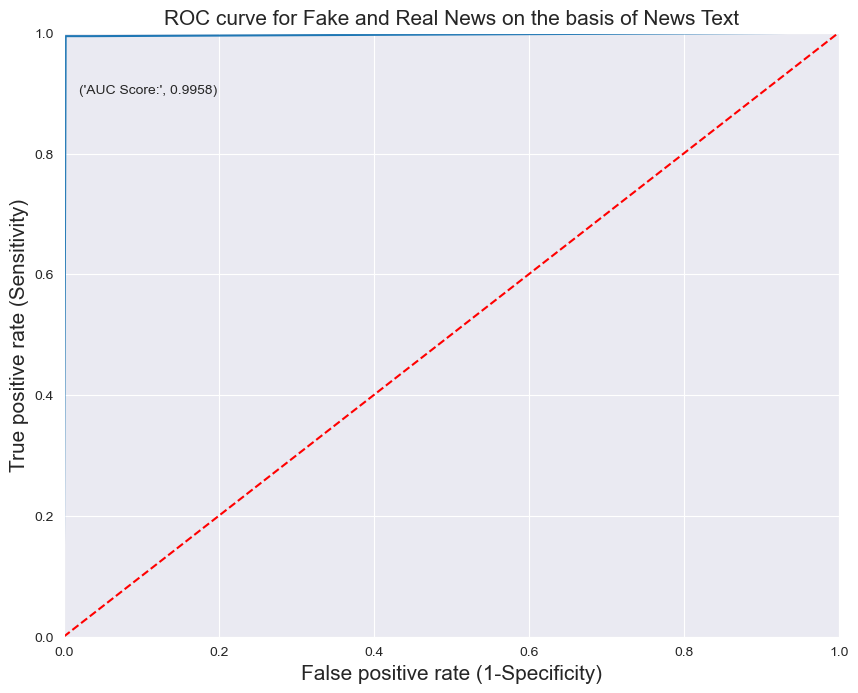

In [87]:
plt.figure(figsize=(10,8),dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred_prob[:,1])
plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for Fake and Real News on the basis of News Text', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),4)))
                               

plt.grid(True)

In [88]:
dt_count_test=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_test, ytest_pred),
               'Recall Score': metrics.recall_score(y_test, ytest_pred),
               'Accuracy Score': metrics.accuracy_score(y_test, ytest_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_test, ytest_pred),
               'f1-score': metrics.f1_score(y_test, ytest_pred)},index=['Test'])
dt_count_test

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Test,0.995798,0.997161,0.994338,0.995972,0.991922,0.995748


In [89]:
dt_count_train=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_train, ytrain_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_train, ytrain_pred),
               'Recall Score': metrics.recall_score(y_train, ytrain_pred),
               'Accuracy Score': metrics.accuracy_score(y_train, ytrain_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_train, ytrain_pred),
               'f1-score': metrics.f1_score(y_train, ytrain_pred)},index=['Train'])
dt_count_train

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Train,0.999999,1.0,0.999941,0.999972,0.999944,0.999971


### Naive Bayes 

**-TFID Model**

In [90]:
X = count_arrayTF1

In [91]:
y = d_news['Fake/Real']

In [92]:
multinomialnb =  MultinomialNB()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (35751, 3000)
X_test: (8938, 3000)
y_train: (35751,)
y_test: (8938,)


In [94]:
skf = StratifiedKFold(n_splits=5)

mnb_tfid = list(cross_val_score(multinomialnb, X_train, y_train, cv=skf, scoring ='accuracy'))

mean_cv_score = np.mean(mnb_tfid)
mnb_tfid.append(mean_cv_score)

In [95]:
mnb_tfid_cv=pd.DataFrame(data=[mnb_tfid],
                        columns=['CV_1','CV_2','CV_3','CV_4','CV_5','Average Score'],
                        index=['Multinomial_Naive_Bayes_TFIDF'])

mnb_tfid_cv

,CV_1,CV_2,CV_3,CV_4,CV_5,Average Score
Multinomial_Naive_Bayes_TFIDF,0.932737,0.934266,0.93049,0.934685,0.937343,0.933904


In [96]:
start_time =t.time()

model_tfid_mnb = multinomialnb.fit(X_train, y_train)
model_tfid_mnb

end_time=t.time()

In [97]:
mnb_tfid_time=end_time-start_time
mnb_tfid_exe=pd.DataFrame(data=mnb_tfid_time,columns=['Training_Time ( in seconds)'],index=['Multinomial_NaiveBayes_TFIDF'])
mnb_tfid_exe

,Training_Time ( in seconds)
Multinomial_NaiveBayes_TFIDF,0.48


In [98]:
start_time =t.time()

ytest_pred = model_tfid_mnb.predict(X_test)

ytrain_pred = model_tfid_mnb.predict(X_train)

end_time=t.time()

In [99]:
mnb_tfid_ptime=end_time-start_time
mnb_tfid_pre=pd.DataFrame(data=mnb_tfid_ptime,columns=['Prediction_Time ( in seconds)'],index=['Multinomial_NaiveBayes_TFIDF'])
mnb_tfid_pre

,Prediction_Time ( in seconds)
Multinomial_NaiveBayes_TFIDF,0.430001


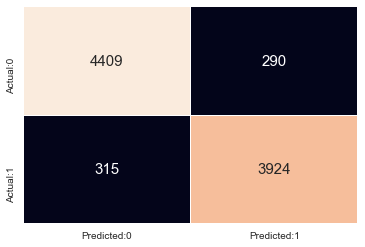

In [100]:
cm = confusion_matrix(y_test, ytest_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})


plt.xticks(fontsize = 10)


plt.yticks(fontsize = 10)


plt.show()

In [101]:
ytest_pred_prob=model_tfid_mnb.predict_proba(X_test)

ytrain_pred_prob=model_tfid_mnb.predict_proba(X_train)


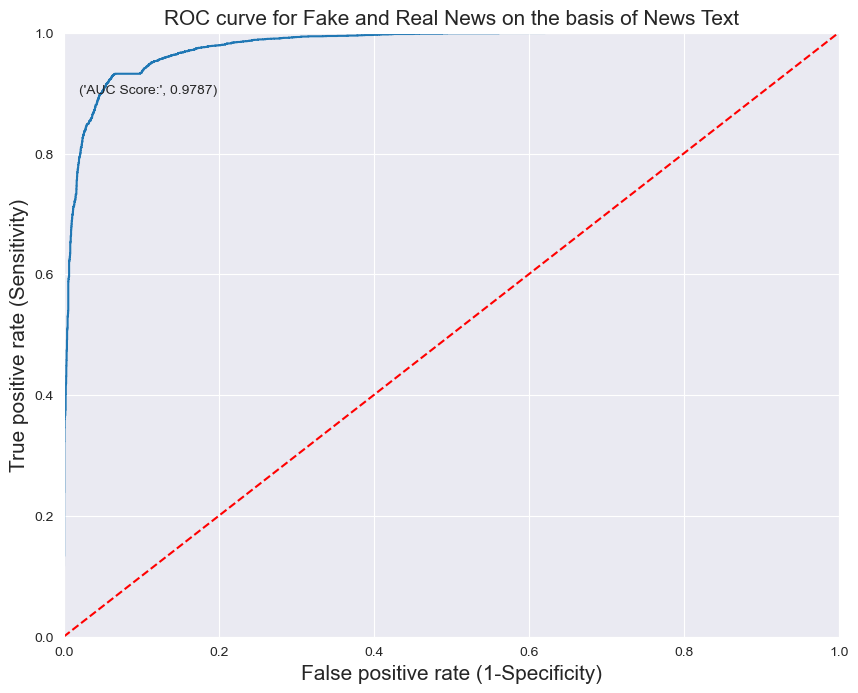

In [102]:
plt.figure(figsize=(10,8),dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred_prob[:,1])
plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for Fake and Real News on the basis of News Text', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),4)))
                               

plt.grid(True)

In [103]:
mnb_tfid_test=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_test, ytest_pred),
               'Recall Score': metrics.recall_score(y_test, ytest_pred),
               'Accuracy Score': metrics.accuracy_score(y_test, ytest_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_test, ytest_pred),
               'f1-score': metrics.f1_score(y_test, ytest_pred)},index=['Test'])
mnb_tfid_test

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Test,0.97869,0.931182,0.92569,0.932311,0.864224,0.928428


In [104]:
mnb_tfid_train=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_train, ytrain_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_train, ytrain_pred),
               'Recall Score': metrics.recall_score(y_train, ytrain_pred),
               'Accuracy Score': metrics.accuracy_score(y_train, ytrain_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_train, ytrain_pred),
               'f1-score': metrics.f1_score(y_train, ytrain_pred)},index=['Train'])
mnb_tfid_train

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Train,0.980835,0.933952,0.93065,0.935834,0.871317,0.932298


**- Count Vectorization Model**

In [105]:
X=count_array1

In [106]:
y = d_news['Fake/Real']

In [107]:
multinomialnb =  MultinomialNB()

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (35751, 3000)
X_test: (8938, 3000)
y_train: (35751,)
y_test: (8938,)


In [109]:
skf = StratifiedKFold(n_splits=5)

mnb_count = list(cross_val_score(multinomialnb, X_train, y_train, cv=skf, scoring ='accuracy'))

mean_cv_score = np.mean(mnb_count)
mnb_count.append(mean_cv_score)

In [110]:
mnb_count_cv=pd.DataFrame(data=[mnb_count],
                        columns=['CV_1','CV_2','CV_3','CV_4','CV_5','Average Score'],
                        index=['Multinomial_Naive_Bayes_CV'])

mnb_count_cv

,CV_1,CV_2,CV_3,CV_4,CV_5,Average Score
Multinomial_Naive_Bayes_CV,0.947839,0.94993,0.94993,0.94993,0.954126,0.950351


In [111]:
start_time =t.time()

model_count_mnb = multinomialnb.fit(X_train, y_train)
model_count_mnb

end_time=t.time()

In [112]:
mnb_count_time=end_time-start_time
mnb_count_exe=pd.DataFrame(data=mnb_count_time,columns=['Training_Time ( in seconds)'],index=['Multinomial_NaiveBayes_CV'])
mnb_count_exe

,Training_Time ( in seconds)
Multinomial_NaiveBayes_CV,4.440006


In [113]:
start_time =t.time()

ytest_pred = model_count_mnb.predict(X_test)

ytrain_pred = model_count_mnb.predict(X_train)

end_time=t.time()

In [114]:
mnb_count_ptime=end_time-start_time
mnb_count_pre=pd.DataFrame(data=mnb_count_ptime,columns=['Prediction_Time ( in seconds)'],index=['Multinomial_NaiveBayes_CV'])
mnb_count_pre

,Prediction_Time ( in seconds)
Multinomial_NaiveBayes_CV,0.900001


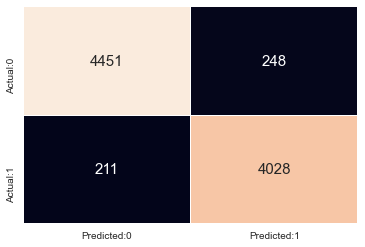

In [115]:
cm = confusion_matrix(y_test, ytest_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})


plt.xticks(fontsize = 10)


plt.yticks(fontsize = 10)


plt.show()

In [116]:
ytest_pred_prob=model_count_mnb.predict_proba(X_test)

ytrain_pred_prob=model_count_mnb.predict_proba(X_train)


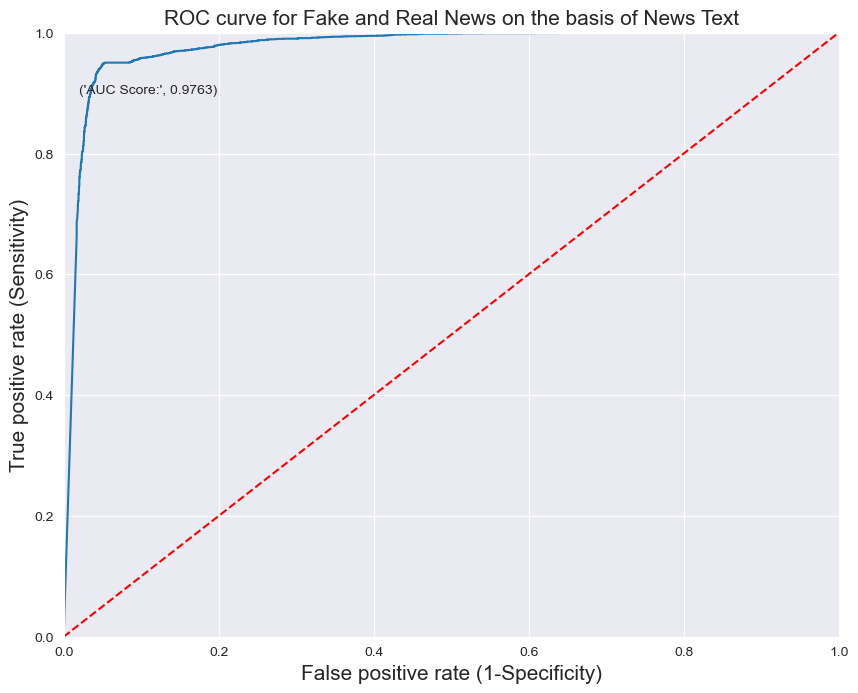

In [117]:
plt.figure(figsize=(10,8),dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred_prob[:,1])
plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for Fake and Real News on the basis of News Text', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),4)))
                               

plt.grid(True)

In [118]:
mnb_count_test=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_test, ytest_pred),
               'Recall Score': metrics.recall_score(y_test, ytest_pred),
               'Accuracy Score': metrics.accuracy_score(y_test, ytest_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_test, ytest_pred),
               'f1-score': metrics.f1_score(y_test, ytest_pred)},index=['Test'])
mnb_count_test

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Test,0.976316,0.942002,0.950224,0.948646,0.897064,0.946095


In [119]:
mnb_count_train=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_train, ytrain_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_train, ytrain_pred),
               'Recall Score': metrics.recall_score(y_train, ytrain_pred),
               'Accuracy Score': metrics.accuracy_score(y_train, ytrain_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_train, ytrain_pred),
               'f1-score': metrics.f1_score(y_train, ytrain_pred)},index=['Train'])
mnb_count_train

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Train,0.979643,0.945009,0.952805,0.951274,0.902337,0.948891


### Random Forest

**-TFIDF Model**

In [202]:
X = count_matrix

In [203]:
y = d_news['Fake/Real']

In [204]:
randomforest = RandomForestClassifier()

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (35751, 3000)
X_test: (8938, 3000)
y_train: (35751,)
y_test: (8938,)


In [124]:
skf = StratifiedKFold(n_splits=5)

rf_tfid = list(cross_val_score(randomforest, X_train, y_train, cv=skf, scoring ='accuracy'))

mean_cv_score = np.mean(rf_tfid)
rf_tfid.append(mean_cv_score)

In [125]:
rf_tfid_cv=pd.DataFrame(data=[rf_tfid],
                        columns=['CV_1','CV_2','CV_3','CV_4','CV_5','Average Score'],
                        index=['Random_Forest_TFIDF'])

rf_tfid_cv

,CV_1,CV_2,CV_3,CV_4,CV_5,Average Score
Random_Forest_TFIDF,0.998322,0.998601,0.996084,0.997343,0.998601,0.99779


In [206]:
start_time =t.time()

model_tfid_rf = randomforest.fit(X_train, y_train)
model_tfid_rf

end_time=t.time()

In [207]:
rf_tfid_time=end_time-start_time
rf_tfid_exe=pd.DataFrame(data=rf_tfid_time,columns=['Training_Time ( in seconds)'],index=['Random_Forest_TFIDF'])
rf_tfid_exe

,Training_Time ( in seconds)
Random_Forest_TFIDF,67.209852


In [208]:
start_time =t.time()

ytest_pred = model_tfid_rf.predict(X_test)

ytrain_pred = model_tfid_rf.predict(X_train)

end_time=t.time()

In [209]:
rf_tfid_ptime=end_time-start_time
rf_tfid_pre=pd.DataFrame(data=rf_tfid_ptime,columns=['Prediction_Time ( in seconds)'],index=['Random_Forest_TFIDF'])
rf_tfid_pre

,Prediction_Time ( in seconds)
Random_Forest_TFIDF,2.855044


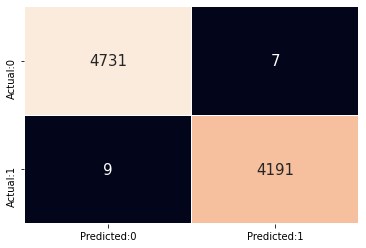

In [210]:
cm = confusion_matrix(y_test, ytest_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})


plt.xticks(fontsize = 10)


plt.yticks(fontsize = 10)


plt.show()

In [211]:
ytest_pred_prob=model_tfid_rf.predict_proba(X_test)

ytrain_pred_prob=model_tfid_rf.predict_proba(X_train)


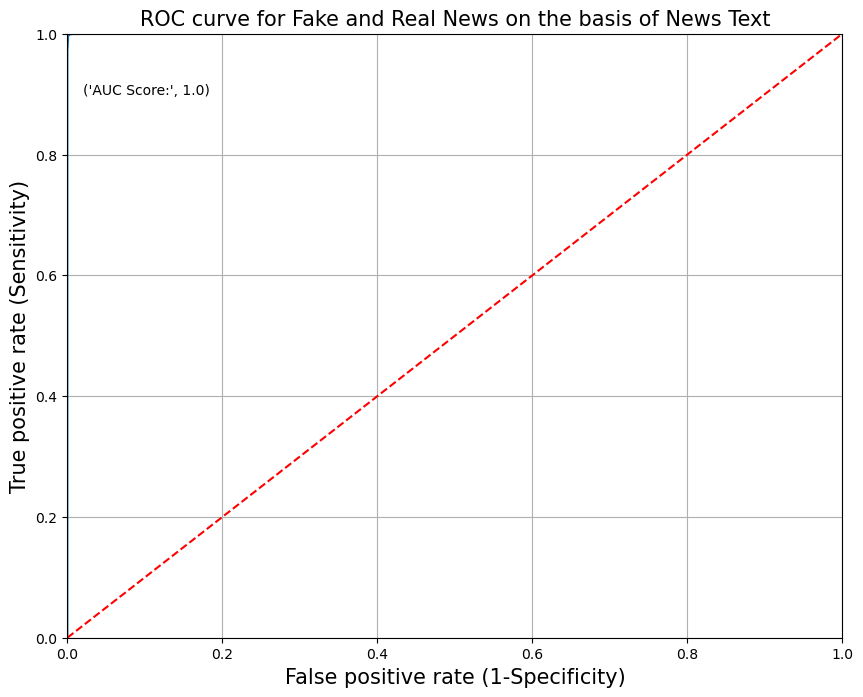

In [212]:
plt.figure(figsize=(10,8),dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred_prob[:,1])
plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for Fake and Real News on the basis of News Text', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),4)))
                               

plt.grid(True)

In [213]:
rf_tfid_test=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_test, ytest_pred),
               'Recall Score': metrics.recall_score(y_test, ytest_pred),
               'Accuracy Score': metrics.accuracy_score(y_test, ytest_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_test, ytest_pred),
               'f1-score': metrics.f1_score(y_test, ytest_pred)},index=['Test'])
rf_tfid_test

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Test,0.999964,0.998333,0.997857,0.99821,0.996407,0.998095


In [214]:
rf_tfid_train=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_train, ytrain_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_train, ytrain_pred),
               'Recall Score': metrics.recall_score(y_train, ytrain_pred),
               'Accuracy Score': metrics.accuracy_score(y_train, ytrain_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_train, ytrain_pred),
               'f1-score': metrics.f1_score(y_train, ytrain_pred)},index=['Train'])
rf_tfid_train

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Train,0.999956,1.0,0.999941,0.999972,0.999944,0.999971


**-Count Vectorizer Model**

In [135]:
X=count_array1

In [136]:
y = d_news['Fake/Real']

In [137]:
randomforest = RandomForestClassifier()

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (35751, 3000)
X_test: (8938, 3000)
y_train: (35751,)
y_test: (8938,)


In [139]:
skf = StratifiedKFold(n_splits=5)

rf_count = list(cross_val_score(randomforest, X_train, y_train, cv=skf, scoring ='accuracy'))

mean_cv_score = np.mean(rf_count)
rf_count.append(mean_cv_score)

In [140]:
rf_count_cv=pd.DataFrame(data=[rf_count],
                        columns=['CV_1','CV_2','CV_3','CV_4','CV_5','Average Score'],
                        index=['Random_Forest_CV'])

rf_count_cv

,CV_1,CV_2,CV_3,CV_4,CV_5,Average Score
Random_Forest_CV,0.998322,0.998462,0.995804,0.998042,0.998182,0.997762


In [141]:
start_time =t.time()

model_count_rf = randomforest.fit(X_train, y_train)
model_count_rf

end_time=t.time()

In [142]:
rf_count_time=end_time-start_time
rf_count_exe=pd.DataFrame(data=rf_count_time,columns=['Training_Time ( in seconds)'],index=['Random_Forest_CV'])
rf_count_exe

,Training_Time ( in seconds)
Random_Forest_CV,79.740112


In [143]:
start_time =t.time()

ytest_pred = model_count_rf.predict(X_test)

ytrain_pred = model_count_rf.predict(X_train)

end_time=t.time()

In [144]:
rf_count_ptime=end_time-start_time
rf_count_pre=pd.DataFrame(data=rf_count_ptime,columns=['Prediction_Time ( in seconds)'],index=['Random_Forest_CV'])
rf_count_pre

,Prediction_Time ( in seconds)
Random_Forest_CV,3.000005


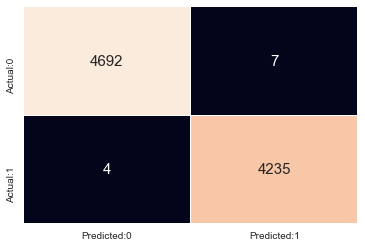

In [145]:
cm = confusion_matrix(y_test, ytest_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})


plt.xticks(fontsize = 10)


plt.yticks(fontsize = 10)


plt.show()

In [146]:
ytest_pred_prob=model_count_rf.predict_proba(X_test)

ytrain_pred_prob=model_count_rf.predict_proba(X_train)


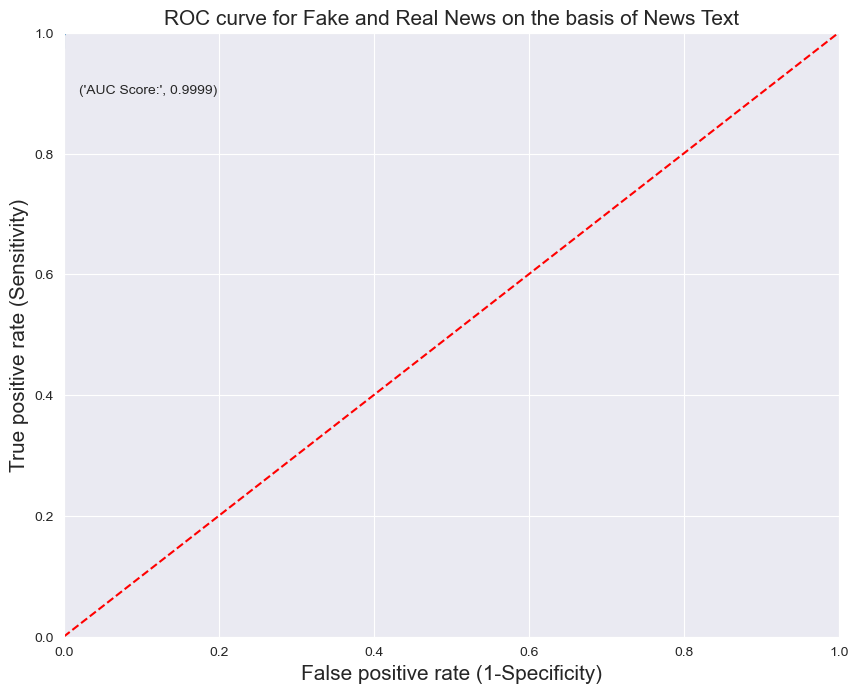

In [147]:
plt.figure(figsize=(10,8),dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred_prob[:,1])
plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for Fake and Real News on the basis of News Text', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),4)))
                               

plt.grid(True)

In [148]:
rf_count_test=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_test, ytest_pred),
               'Recall Score': metrics.recall_score(y_test, ytest_pred),
               'Accuracy Score': metrics.accuracy_score(y_test, ytest_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_test, ytest_pred),
               'f1-score': metrics.f1_score(y_test, ytest_pred)},index=['Test'])
rf_count_test

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Test,0.999902,0.99835,0.999056,0.998769,0.997532,0.998703


In [149]:
rf_count_train=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_train, ytrain_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_train, ytrain_pred),
               'Recall Score': metrics.recall_score(y_train, ytrain_pred),
               'Accuracy Score': metrics.accuracy_score(y_train, ytrain_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_train, ytrain_pred),
               'f1-score': metrics.f1_score(y_train, ytrain_pred)},index=['Train'])
rf_count_train

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Train,0.999956,1.0,0.999941,0.999972,0.999944,0.999971


### Adaptive Boosting

**-TFIDF Model**

In [150]:
X = count_arrayTF1

In [151]:
y = d_news['Fake/Real']

In [152]:
adaboost = AdaBoostClassifier()

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (35751, 3000)
X_test: (8938, 3000)
y_train: (35751,)
y_test: (8938,)


In [154]:
skf = StratifiedKFold(n_splits=5)

ab_tfid = list(cross_val_score(adaboost, X_train, y_train, cv=skf, scoring ='accuracy'))

mean_cv_score = np.mean(ab_tfid)
ab_tfid.append(mean_cv_score)

In [155]:
ab_tfid_cv=pd.DataFrame(data=[ab_tfid],
                        columns=['CV_1','CV_2','CV_3','CV_4','CV_5','Average Score'],
                        index=['Adaptive_Boosting_TFIDF'])

ab_tfid_cv

,CV_1,CV_2,CV_3,CV_4,CV_5,Average Score
Adaptive_Boosting_TFIDF,0.994406,0.995385,0.993706,0.995524,0.995524,0.994909


In [156]:
start_time =t.time()

model_tfid_ab = adaboost.fit(X_train, y_train)
model_tfid_ab

end_time=t.time()

In [157]:
ab_tfid_time=end_time-start_time
ab_tfid_exe=pd.DataFrame(data=ab_tfid_time,columns=['Training_Time ( in seconds)'],index=['Adaptive_Boosting_TFIDF'])
ab_tfid_exe

,Training_Time ( in seconds)
Adaptive_Boosting_TFIDF,251.740352


In [158]:
start_time =t.time()

ytest_pred = model_tfid_ab.predict(X_test)

ytrain_pred = model_tfid_ab.predict(X_train)

end_time=t.time()

In [159]:
ab_tfid_ptime=end_time-start_time
ab_tfid_pre=pd.DataFrame(data=ab_tfid_ptime,columns=['Prediction_Time ( in seconds)'],index=['Adaptive_Boosting_TFIDF'])
ab_tfid_pre

,Prediction_Time ( in seconds)
Adaptive_Boosting_TFIDF,31.070044


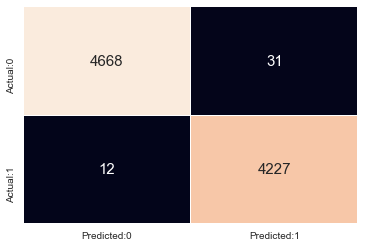

In [160]:
cm = confusion_matrix(y_test, ytest_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})


plt.xticks(fontsize = 10)


plt.yticks(fontsize = 10)


plt.show()

In [161]:
ytest_pred_prob=model_tfid_ab.predict_proba(X_test)

ytrain_pred_prob=model_tfid_ab.predict_proba(X_train)


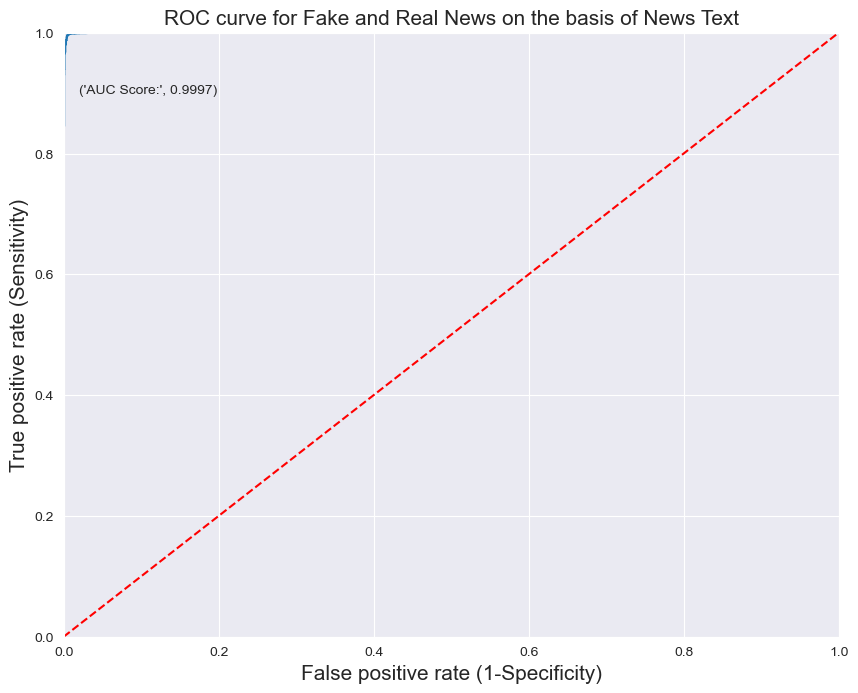

In [162]:
plt.figure(figsize=(10,8),dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred_prob[:,1])
plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for Fake and Real News on the basis of News Text', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),4)))
                               

plt.grid(True)

In [163]:
ab_tfid_test=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_test, ytest_pred),
               'Recall Score': metrics.recall_score(y_test, ytest_pred),
               'Accuracy Score': metrics.accuracy_score(y_test, ytest_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_test, ytest_pred),
               'f1-score': metrics.f1_score(y_test, ytest_pred)},index=['Test'])
ab_tfid_test

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Test,0.999731,0.99272,0.997169,0.995189,0.990355,0.994939


In [164]:
ab_tfid_train=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_train, ytrain_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_train, ytrain_pred),
               'Recall Score': metrics.recall_score(y_train, ytrain_pred),
               'Accuracy Score': metrics.accuracy_score(y_train, ytrain_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_train, ytrain_pred),
               'f1-score': metrics.f1_score(y_train, ytrain_pred)},index=['Train'])
ab_tfid_train

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Train,0.999939,0.994417,0.997054,0.995944,0.991869,0.995734


**-Count Vectorizer Model**

In [165]:
X=count_array1

In [166]:
y = d_news['Fake/Real']

In [167]:
adaboost = AdaBoostClassifier()

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (35751, 3000)
X_test: (8938, 3000)
y_train: (35751,)
y_test: (8938,)


In [169]:
skf = StratifiedKFold(n_splits=5)

ab_count = list(cross_val_score(adaboost, X_train, y_train, cv=skf, scoring ='accuracy'))

mean_cv_score = np.mean(ab_count)
ab_count.append(mean_cv_score)

In [170]:
ab_count_cv=pd.DataFrame(data=[ab_count],
                        columns=['CV_1','CV_2','CV_3','CV_4','CV_5','Average Score'],
                        index=['Adaptive_Boosting_CV'])

ab_count_cv

,CV_1,CV_2,CV_3,CV_4,CV_5,Average Score
Adaptive_Boosting_CV,0.994966,0.994965,0.993706,0.996503,0.996783,0.995385


In [171]:
start_time =t.time()

model_count_ab = adaboost.fit(X_train, y_train)
model_count_ab

end_time=t.time()

In [172]:
ab_count_time=end_time-start_time
ab_count_exe=pd.DataFrame(data=ab_count_time,columns=['Training_Time ( in seconds)'],index=['Adaptive_Boosting_CV'])
ab_count_exe

,Training_Time ( in seconds)
Adaptive_Boosting_CV,229.950322


In [173]:
start_time =t.time()

ytest_pred = model_count_ab.predict(X_test)

ytrain_pred = model_count_ab.predict(X_train)

end_time=t.time()

In [174]:
ab_count_ptime=end_time-start_time
ab_count_pre=pd.DataFrame(data=ab_count_ptime,columns=['Prediction_Time ( in seconds)'],index=['Adaptive_Boosting_CV'])
ab_count_pre

,Prediction_Time ( in seconds)
Adaptive_Boosting_CV,30.220042


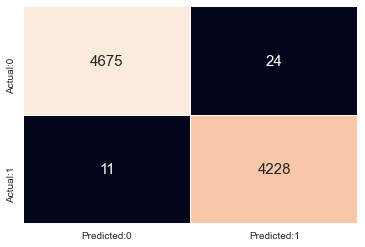

In [175]:
cm = confusion_matrix(y_test, ytest_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})


plt.xticks(fontsize = 10)


plt.yticks(fontsize = 10)


plt.show()

In [176]:
ytest_pred_prob=model_count_ab.predict_proba(X_test)

ytrain_pred_prob=model_count_ab.predict_proba(X_train)


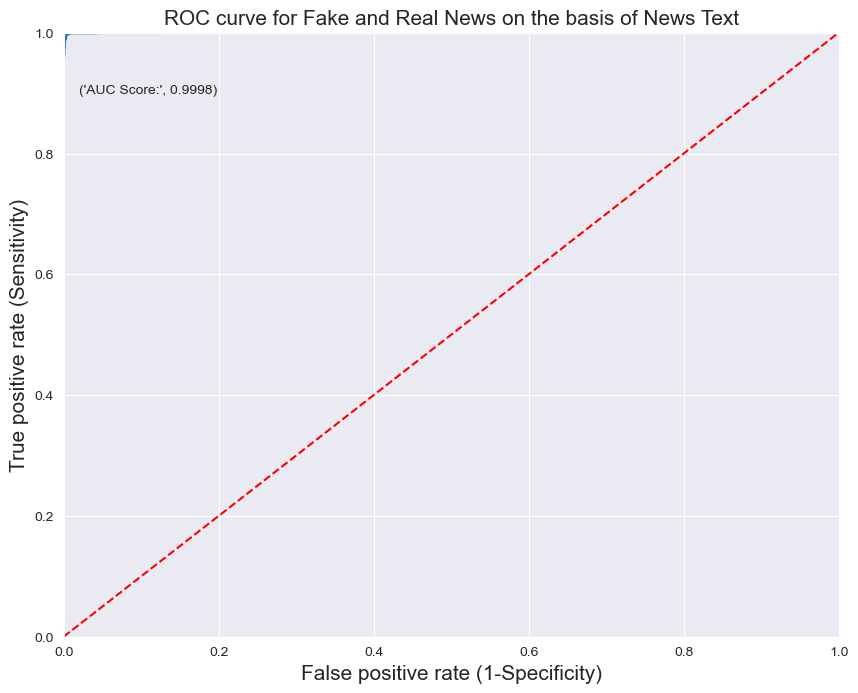

In [177]:
plt.figure(figsize=(10,8),dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred_prob[:,1])
plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for Fake and Real News on the basis of News Text', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),4)))
                               

plt.grid(True)

In [178]:
ab_count_test=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_test, ytest_pred),
               'Recall Score': metrics.recall_score(y_test, ytest_pred),
               'Accuracy Score': metrics.accuracy_score(y_test, ytest_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_test, ytest_pred),
               'f1-score': metrics.f1_score(y_test, ytest_pred)},index=['Test'])
ab_count_test

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Test,0.999835,0.994356,0.997405,0.996084,0.992149,0.995878


In [179]:
ab_count_train=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_train, ytrain_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_train, ytrain_pred),
               'Recall Score': metrics.recall_score(y_train, ytrain_pred),
               'Accuracy Score': metrics.accuracy_score(y_train, ytrain_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_train, ytrain_pred),
               'f1-score': metrics.f1_score(y_train, ytrain_pred)},index=['Train'])
ab_count_train

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Train,0.999933,0.994359,0.997054,0.995916,0.991813,0.995705


### Gradient Boosting 

**-TFIDF Model**

In [180]:
X = count_arrayTF1

In [181]:
y = d_news['Fake/Real']

In [182]:
gradientboost = GradientBoostingClassifier()

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (35751, 3000)
X_test: (8938, 3000)
y_train: (35751,)
y_test: (8938,)


In [184]:
skf = StratifiedKFold(n_splits=5)

gb_tfid = list(cross_val_score(gradientboost, X_train, y_train, cv=skf, scoring ='accuracy'))

mean_cv_score = np.mean(gb_tfid)
gb_tfid.append(mean_cv_score)

In [185]:
gb_tfid_cv=pd.DataFrame(data=[gb_tfid],
                        columns=['CV_1','CV_2','CV_3','CV_4','CV_5','Average Score'],
                        index=['Gradient_Boosting_TFIDF'])

gb_tfid_cv

,CV_1,CV_2,CV_3,CV_4,CV_5,Average Score
Gradient_Boosting_TFIDF,0.994406,0.995385,0.992727,0.995524,0.997063,0.995021


In [186]:
start_time =t.time()

model_tfid_gb = gradientboost.fit(X_train, y_train)
model_tfid_gb

end_time=t.time()

In [187]:
gb_tfid_time=end_time-start_time
gb_tfid_exe=pd.DataFrame(data=gb_tfid_time,columns=['Training_Time ( in seconds)'],index=['Gradient_Boosting_TFIDF'])
gb_tfid_exe

,Training_Time ( in seconds)
Gradient_Boosting_TFIDF,1102.161543


In [188]:
start_time =t.time()

ytest_pred = model_tfid_gb.predict(X_test)

ytrain_pred = model_tfid_gb.predict(X_train)

end_time=t.time()

In [189]:
gb_tfid_ptime=end_time-start_time
gb_tfid_pre=pd.DataFrame(data=gb_tfid_ptime,columns=['Prediction_Time ( in seconds)'],index=['Gradient_Boosting_TFIDF'])
gb_tfid_pre

,Prediction_Time ( in seconds)
Gradient_Boosting_TFIDF,1.140002


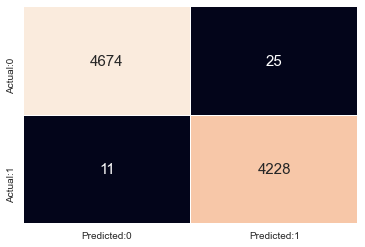

In [190]:
cm = confusion_matrix(y_test, ytest_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})


plt.xticks(fontsize = 10)


plt.yticks(fontsize = 10)


plt.show()

In [191]:
ytest_pred_prob=model_tfid_gb.predict_proba(X_test)

ytrain_pred_prob=model_tfid_gb.predict_proba(X_train)


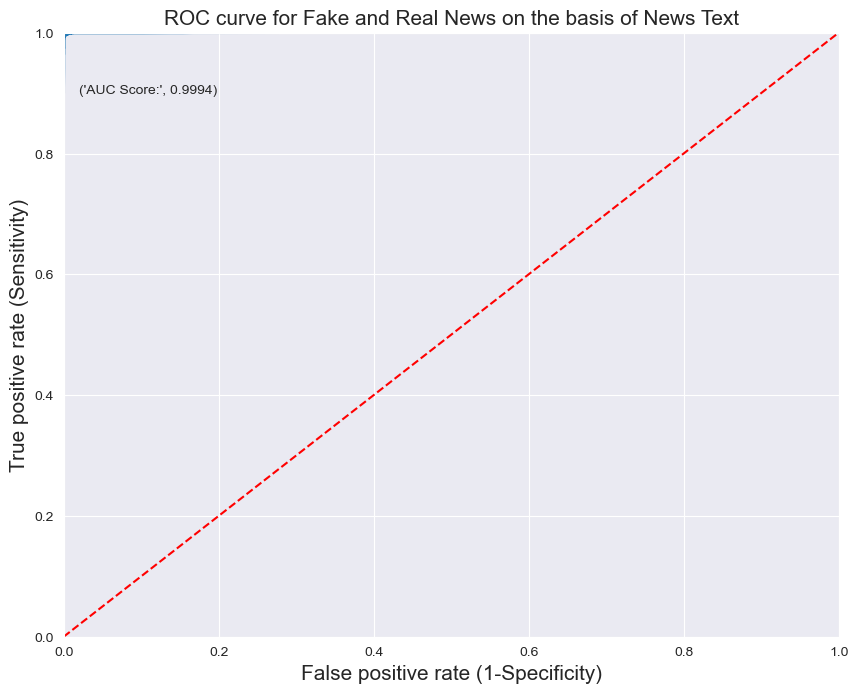

In [192]:
plt.figure(figsize=(10,8),dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred_prob[:,1])
plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for Fake and Real News on the basis of News Text', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),4)))
                               

plt.grid(True)

In [193]:
gb_tfid_test=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_test, ytest_pred),
               'Recall Score': metrics.recall_score(y_test, ytest_pred),
               'Accuracy Score': metrics.accuracy_score(y_test, ytest_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_test, ytest_pred),
               'f1-score': metrics.f1_score(y_test, ytest_pred)},index=['Test'])
gb_tfid_test

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Test,0.999444,0.994122,0.997405,0.995972,0.991924,0.995761


In [194]:
gb_tfid_train=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_train, ytrain_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_train, ytrain_pred),
               'Recall Score': metrics.recall_score(y_train, ytrain_pred),
               'Accuracy Score': metrics.accuracy_score(y_train, ytrain_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_train, ytrain_pred),
               'f1-score': metrics.f1_score(y_train, ytrain_pred)},index=['Train'])
gb_tfid_train

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Train,0.999688,0.995769,0.998409,0.997231,0.994448,0.997087


**-Count Vectorizer Model**

In [195]:
X=count_array1

In [196]:
y = d_news['Fake/Real']

In [197]:
gradientboost = GradientBoostingClassifier()

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (35751, 3000)
X_test: (8938, 3000)
y_train: (35751,)
y_test: (8938,)


In [199]:
skf = StratifiedKFold(n_splits=5)

gb_count = list(cross_val_score(gradientboost, X_train, y_train, cv=skf, scoring ='accuracy'))

mean_cv_score = np.mean(gb_count)
gb_count.append(mean_cv_score)

In [200]:
gb_count_cv=pd.DataFrame(data=[gb_count],
                        columns=['CV_1','CV_2','CV_3','CV_4','CV_5','Average Score'],
                        index=['Gradient_Boosting_CV'])

gb_count_cv

,CV_1,CV_2,CV_3,CV_4,CV_5,Average Score
Gradient_Boosting_CV,0.995245,0.995524,0.992727,0.995664,0.997063,0.995245


In [201]:
start_time =t.time()

model_count_gb = gradientboost.fit(X_train, y_train)
model_count_gb

end_time=t.time()

In [202]:
gb_count_time=end_time-start_time
gb_count_exe=pd.DataFrame(data=gb_count_time,columns=['Training_Time ( in seconds)'],index=['Gradient_Boosting_CV'])
gb_count_exe

,Training_Time ( in seconds)
Gradient_Boosting_CV,993.24239


In [203]:
start_time =t.time()

ytest_pred = model_count_gb.predict(X_test)

ytrain_pred = model_count_gb.predict(X_train)

end_time=t.time()

In [204]:
gb_count_ptime=end_time-start_time
gb_count_pre=pd.DataFrame(data=gb_count_ptime,columns=['Prediction_Time ( in seconds)'],index=['Gradient_Boosting_CV'])
gb_count_pre

,Prediction_Time ( in seconds)
Gradient_Boosting_CV,1.150002


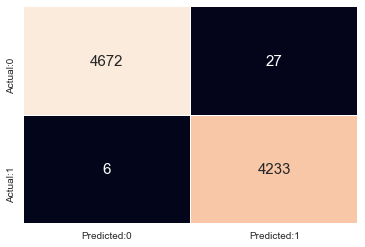

In [205]:
cm = confusion_matrix(y_test, ytest_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})


plt.xticks(fontsize = 10)


plt.yticks(fontsize = 10)


plt.show()

In [206]:
ytest_pred_prob=model_count_gb.predict_proba(X_test)

ytrain_pred_prob=model_count_gb.predict_proba(X_train)


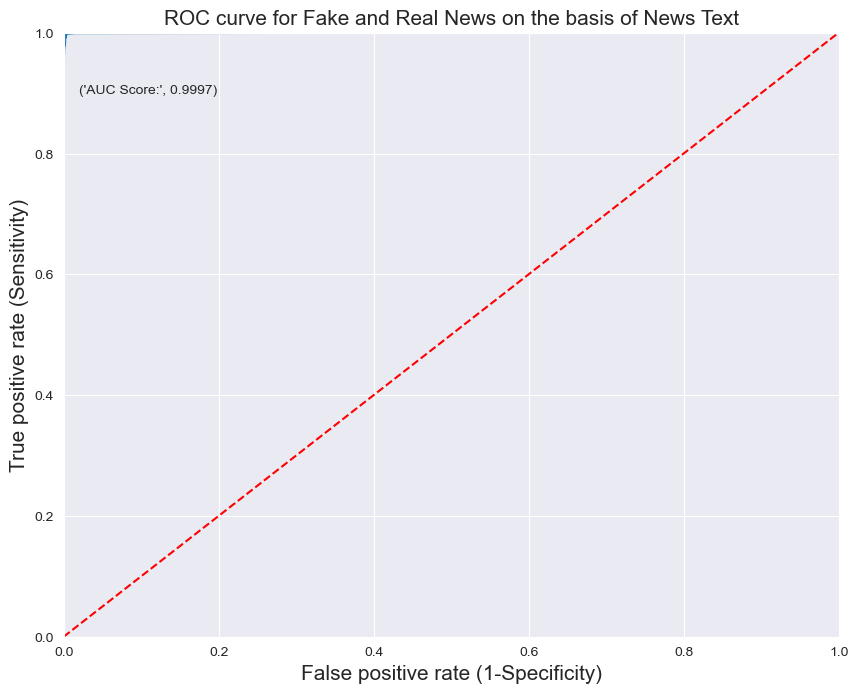

In [207]:
plt.figure(figsize=(10,8),dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred_prob[:,1])
plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for Fake and Real News on the basis of News Text', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),4)))
                               

plt.grid(True)

In [208]:
gb_count_test=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_test, ytest_pred),
               'Recall Score': metrics.recall_score(y_test, ytest_pred),
               'Accuracy Score': metrics.accuracy_score(y_test, ytest_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_test, ytest_pred),
               'f1-score': metrics.f1_score(y_test, ytest_pred)},index=['Test'])
gb_count_test

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Test,0.999732,0.993662,0.998585,0.996308,0.992598,0.996117


In [209]:
gb_count_train=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_train, ytrain_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_train, ytrain_pred),
               'Recall Score': metrics.recall_score(y_train, ytrain_pred),
               'Accuracy Score': metrics.accuracy_score(y_train, ytrain_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_train, ytrain_pred),
               'f1-score': metrics.f1_score(y_train, ytrain_pred)},index=['Train'])
gb_count_train

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Train,0.999787,0.994836,0.998939,0.997035,0.994056,0.996884


### XG Boosting

**-TFIDF Model**

In [210]:
X = count_arrayTF1

In [211]:
y = d_news['Fake/Real']

In [212]:
xgboost = XGBClassifier()

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (35751, 3000)
X_test: (8938, 3000)
y_train: (35751,)
y_test: (8938,)


In [214]:
skf = StratifiedKFold(n_splits=5)

xg_tfid = list(cross_val_score(xgboost, X_train, y_train, cv=skf, scoring ='accuracy'))

mean_cv_score = np.mean(xg_tfid)
xg_tfid.append(mean_cv_score)

[11:07:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:17:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:21:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [215]:
xg_tfid_cv=pd.DataFrame(data=[xg_tfid],
                        columns=['CV_1','CV_2','CV_3','CV_4','CV_5','Average Score'],
                        index=['XG_Boosting_TFIDF'])

xg_tfid_cv

,CV_1,CV_2,CV_3,CV_4,CV_5,Average Score
XG_Boosting_TFIDF,0.997483,0.998741,0.995105,0.997343,0.997343,0.997203


In [216]:
start_time =t.time()

model_tfid_xg = xgboost.fit(X_train, y_train)
model_tfid_xg

end_time=t.time()

[11:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [217]:
xg_tfid_time=end_time-start_time
xg_tfid_exe=pd.DataFrame(data=xg_tfid_time,columns=['Training_Time ( in seconds)'],index=['XG_Boosting_TFIDF'])
xg_tfid_exe

,Training_Time ( in seconds)
XG_Boosting_TFIDF,363.962727


In [218]:
start_time =t.time()

ytest_pred = model_tfid_xg.predict(X_test)

ytrain_pred = model_tfid_xg.predict(X_train)

end_time=t.time()

In [219]:
xg_tfid_ptime=end_time-start_time
xg_tfid_pre=pd.DataFrame(data=xg_tfid_ptime,columns=['Prediction_Time ( in seconds)'],index=['XG_Boosting_TFIDF'])
xg_tfid_pre

,Prediction_Time ( in seconds)
XG_Boosting_TFIDF,2.196122


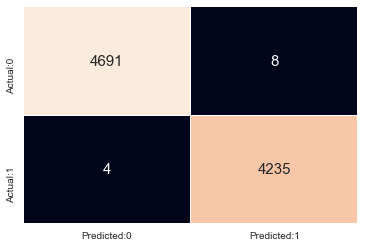

In [220]:
cm = confusion_matrix(y_test, ytest_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})


plt.xticks(fontsize = 10)


plt.yticks(fontsize = 10)


plt.show()

In [221]:
ytest_pred_prob=model_tfid_xg .predict_proba(X_test)

ytrain_pred_prob=model_tfid_xg .predict_proba(X_train)


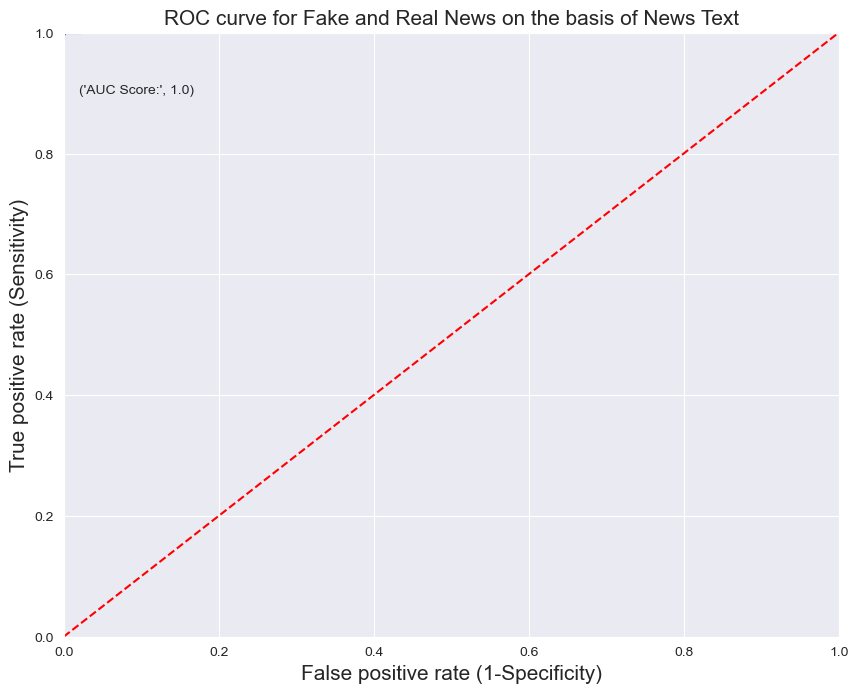

In [222]:
plt.figure(figsize=(10,8),dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred_prob[:,1])
plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for Fake and Real News on the basis of News Text', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),4)))
                               

plt.grid(True)

In [223]:
xg_tfid_test=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_test, ytest_pred),
               'Recall Score': metrics.recall_score(y_test, ytest_pred),
               'Accuracy Score': metrics.accuracy_score(y_test, ytest_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_test, ytest_pred),
               'f1-score': metrics.f1_score(y_test, ytest_pred)},index=['Test'])
xg_tfid_test

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Test,0.999979,0.998115,0.999056,0.998657,0.997308,0.998585


In [224]:
xg_tfid_train=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_train, ytrain_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_train, ytrain_pred),
               'Recall Score': metrics.recall_score(y_train, ytrain_pred),
               'Accuracy Score': metrics.accuracy_score(y_train, ytrain_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_train, ytrain_pred),
               'f1-score': metrics.f1_score(y_train, ytrain_pred)},index=['Train'])
xg_tfid_train

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Train,0.999997,1.0,0.999941,0.999972,0.999944,0.999971


**-Count Vectorizer Model**

In [225]:
X=count_array1

In [226]:
y = d_news['Fake/Real']

In [227]:
xgboost = XGBClassifier()

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (35751, 3000)
X_test: (8938, 3000)
y_train: (35751,)
y_test: (8938,)


In [229]:
skf = StratifiedKFold(n_splits=5)

xg_count = list(cross_val_score(xgboost, X_train, y_train, cv=skf, scoring ='accuracy'))

mean_cv_score = np.mean(xg_count)
xg_count.append(mean_cv_score)

[11:37:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:42:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:51:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [230]:
xg_count_cv=pd.DataFrame(data=[xg_count],
                        columns=['CV_1','CV_2','CV_3','CV_4','CV_5','Average Score'],
                        index=['XG_Boosting_CV'])

xg_count_cv

,CV_1,CV_2,CV_3,CV_4,CV_5,Average Score
XG_Boosting_CV,0.998042,0.998601,0.995804,0.997343,0.998042,0.997566


In [231]:
start_time =t.time()

model_count_xg = xgboost.fit(X_train, y_train)
model_count_xg

end_time=t.time()

[12:00:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [232]:
xg_count_time=end_time-start_time
xg_count_exe=pd.DataFrame(data=xg_count_time,columns=['Training_Time ( in seconds)'],index=['XG_Boosting_CV'])
xg_count_exe

,Training_Time ( in seconds)
XG_Boosting_CV,335.971118


In [233]:
start_time =t.time()

ytest_pred = model_count_xg.predict(X_test)

ytrain_pred = model_count_xg.predict(X_train)

end_time=t.time()

In [234]:
xg_count_ptime=end_time-start_time
xg_count_pre=pd.DataFrame(data=xg_count_ptime,columns=['Prediction_Time ( in seconds)'],index=['XG_Boosting_CV'])
xg_count_pre

,Prediction_Time ( in seconds)
XG_Boosting_CV,2.274127


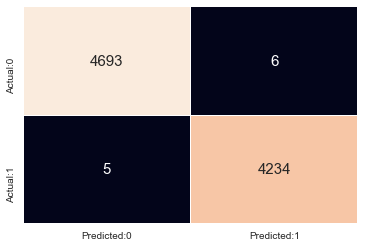

In [235]:
cm = confusion_matrix(y_test, ytest_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})


plt.xticks(fontsize = 10)


plt.yticks(fontsize = 10)


plt.show()

In [236]:
ytest_pred_prob=model_count_xg.predict_proba(X_test)

ytrain_pred_prob=model_count_xg.predict_proba(X_train)

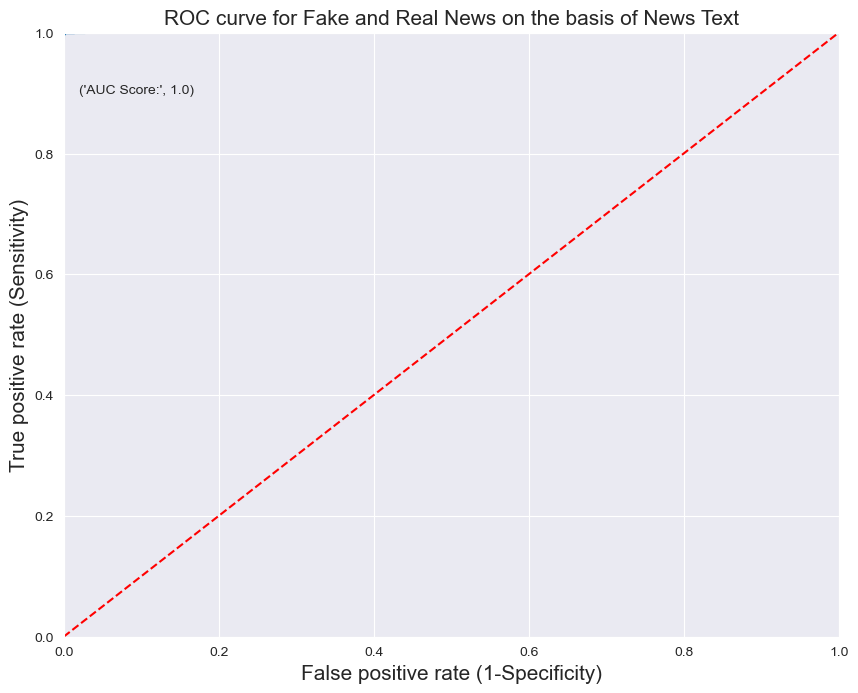

In [237]:
plt.figure(figsize=(10,8),dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred_prob[:,1])
plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.title('ROC curve for Fake and Real News on the basis of News Text', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),4)))
                               

plt.grid(True)

In [238]:
xg_count_test=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_test, ytest_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_test, ytest_pred),
               'Recall Score': metrics.recall_score(y_test, ytest_pred),
               'Accuracy Score': metrics.accuracy_score(y_test, ytest_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_test, ytest_pred),
               'f1-score': metrics.f1_score(y_test, ytest_pred)},index=['Test'])
xg_count_test

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Test,0.999973,0.998585,0.99882,0.998769,0.997532,0.998703


In [239]:
xg_count_train=pd.DataFrame({ 'AUC Score' : metrics.roc_auc_score(y_train, ytrain_pred_prob[:,1]),
               'Precision Score': metrics.precision_score(y_train, ytrain_pred),
               'Recall Score': metrics.recall_score(y_train, ytrain_pred),
               'Accuracy Score': metrics.accuracy_score(y_train, ytrain_pred),
               'Kappa Score':metrics.cohen_kappa_score(y_train, ytrain_pred),
               'f1-score': metrics.f1_score(y_train, ytrain_pred)},index=['Train'])
xg_count_train

,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Train,0.999997,1.0,0.999941,0.999972,0.999944,0.999971


## Model's Result

**-Model's Evaluation Result**

In [240]:
#Logistic Regression Model Result for TFID  and CV.
lr_tfid = pd.concat(objs=[lr_tfid_test, lr_tfid_train], axis=0)
lr_count = pd.concat(objs=[lr_count_test, lr_count_train], axis=0)

#Decesion Tree Model Result for TFID  and CV.
dt_tfid = pd.concat(objs=[ dt_tfid_test,dt_tfid_train], axis=0)
dt_count = pd.concat(objs=[ dt_count_test,dt_count_train], axis=0)

#Naive Bayes Model Result for TFID  and CV.
mnb_tfid = pd.concat(objs=[ mnb_tfid_test,mnb_tfid_train], axis=0)
mnb_count = pd.concat(objs=[ mnb_count_test,mnb_count_train], axis=0)

#Random Forest Model Result for TFID  and CV.
rf_tfid = pd.concat(objs=[ rf_tfid_test,rf_tfid_train], axis=0)
rf_count = pd.concat(objs=[ rf_count_test,rf_count_train], axis=0)

#Adaptive Boosting Model Result for TFID  and CV.
ab_tfid = pd.concat(objs=[ ab_tfid_test,ab_tfid_train], axis=0)
ab_count = pd.concat(objs=[ ab_count_test,ab_count_train], axis=0)

#Gradient Boosting Model Result for TFID  and CV.
gb_tfid = pd.concat(objs=[ gb_tfid_test,gb_tfid_train], axis=0)
gb_count = pd.concat(objs=[ gb_count_test,gb_count_train], axis=0)

#XG Boosting Model Result for TFID  and CV.
xg_tfid = pd.concat(objs=[ xg_tfid_test,xg_tfid_train], axis=0)
xg_count = pd.concat(objs=[ xg_count_test,xg_count_train], axis=0)


#Collctive Result of Models
model_result=pd.concat(objs=[lr_tfid, lr_count, dt_tfid, 
                             dt_count, mnb_tfid, mnb_count, 
                             rf_tfid, rf_count, 
                             ab_tfid, ab_count
                            ,gb_tfid, gb_count,
                             xg_tfid, xg_count], 
                       
          keys=['Logistic Regression (TFIDF)', 'Logistic Regression (CV)',
               'Decesion Tree (TFIDF)', 'Decesion Tree (CV)',
               'Multinomial Naive Bayes (TFIDF)', 'Multinomial Naive Bayes (CV)',
               'Random Forest (TFIDF)', 'Random Forest (CV)',
               'Adaptive Boosting (TFIDF)', 'Adaptive Boosting (CV)',
               'Gradient Boosting (TFIDF)', 'Gradient Boosting (CV)',
               'XG Boosting (TFIDF)', 'XG Boosting (CV)'],    
                       
          names=['Model','Split'],axis=0)

model_result

AUC Score  Precision Score  \
Model                           Split                               
Logistic Regression (TFIDF)     Test    0.998843         0.986799   
                                Train   0.999347         0.989486   
Logistic Regression (CV)        Test    0.999262         0.996693   
                                Train   0.999998         1.000000   
Decesion Tree (TFIDF)           Test    0.996270         0.997399   
                                Train   0.999999         1.000000   
Decesion Tree (CV)              Test    0.995798         0.997161   
                                Train   0.999999         1.000000   
Multinomial Naive Bayes (TFIDF) Test    0.978690         0.931182   
                                Train   0.980835         0.933952   
Multinomial Naive Bayes (CV)    Test    0.976316         0.942002   
                                Train   0.979643         0.945009   
Random Forest (TFIDF)           Test    0.999964         0.998350   
                                Train   0.999955         1.000000   
Random Forest (CV)              Test    0.999902         0.998350   
                                Train   0.999956         1.000000   
Adaptive Boosting (TFIDF)       Test    0.999731         0.992720   
                                Train   0.999939         0.994417   
Adaptive Boosting (CV)          Test    0.999835         0.994356   
                                Train   0.999933         0.994359   
Gradient Boosting (TFIDF)       Test    0.999444         0.994122   
                                Train   0.999688         0.995769   
Gradient Boosting (CV)          Test    0.999732         0.993662   
                                Train   0.999787         0.994836   
XG Boosting (TFIDF)             Test    0.999979         0.998115   
                                Train   0.999997         1.000000   
XG Boosting (CV)                Test    0.999973         0.998585   
                                Train   0.999997         1.000000   

                                       Recall Score  Accuracy Score  \
Model                           Split                                 
Logistic Regression (TFIDF)     Test       0.987497        0.987805   
                                Train      0.992576        0.991469   
Logistic Regression (CV)        Test       0.995518        0.996308   
                                Train      0.999941        0.999972   
Decesion Tree (TFIDF)           Test       0.995046        0.996420   
                                Train      0.999941        0.999972   
Decesion Tree (CV)              Test       0.994338        0.995972   
                                Train      0.999941        0.999972   
Multinomial Naive Bayes (TFIDF) Test       0.925690        0.932311   
                                Train      0.930650        0.935834   
Multinomial Naive Bayes (CV)    Test       0.950224        0.948646   
                                Train      0.952805        0.951274   
Random Forest (TFIDF)           Test       0.999056        0.998769   
                                Train      0.999941        0.999972   
Random Forest (CV)              Test       0.999056        0.998769   
                                Train      0.999941        0.999972   
Adaptive Boosting (TFIDF)       Test       0.997169        0.995189   
                                Train      0.997054        0.995944   
Adaptive Boosting (CV)          Test       0.997405        0.996084   
                                Train      0.997054        0.995916   
Gradient Boosting (TFIDF)       Test       0.997405        0.995972   
                                Train      0.998409        0.997231   
Gradient Boosting (CV)          Test       0.998585        0.996308   
                                Train      0.998939        0.997035   
XG Boosting (TFIDF)             Test       0.999056        0.998657   
                                Train      0.999941

**- Model's Cross Validation Result**

In [241]:
model_testing_accuracy=pd.concat(objs=
                                      [lr_tfid_test['Accuracy Score'],lr_count_test['Accuracy Score'],
                                       dt_tfid_test['Accuracy Score'],dt_count_test['Accuracy Score'],
                                       mnb_tfid_test['Accuracy Score'],mnb_count_test['Accuracy Score'],
                                       rf_tfid_test['Accuracy Score'],rf_count_test['Accuracy Score'],
                                       ab_tfid_test['Accuracy Score'],ab_count_test['Accuracy Score'],
                                       gb_tfid_test['Accuracy Score'],gb_count_test['Accuracy Score'],
                                       xg_tfid_test['Accuracy Score'],xg_count_test['Accuracy Score']],
                                axis=0)

model_testing_accuracy_score=pd.DataFrame({'Testing Accuracy Score':list(model_testing_accuracy)},
               
                                           index=
                                           ['Logistic_Regression_TFIDF', 'Logistic_Regression_CV',
                                           'Decesion_Tree_TFIDF', 'Decesion_Tree_CV',
                                           'Multinomial_Naive_Bayes_TFIDF', 'Multinomial_Naive_Bayes_CV',
                                           'Random_Forest_TFIDF', 'Random_Forest_CV',
                                           'Adaptive_Boosting_TFIDF', 'Adaptive_Boosting_CV',
                                           'Gradient_Boosting_TFIDF', 'Gradient_Boosting_CV',
                                           'XG_Boosting_TFIDF', 'XG_Boosting_CV']
                                          )


In [242]:
cross_validation_result = pd.concat(objs=[lg_tfid_cv, lg_count_cv, dt_tfid_cv, dt_count_cv,
                                         mnb_tfid_cv, mnb_count_cv, rf_tfid_cv, rf_count_cv,
                                         ab_tfid_cv, ab_count_cv, gb_tfid_cv, gb_count_cv,
                                         xg_tfid_cv,xg_count_cv],
                                   axis=0)

model_cv_test_comparision=pd.concat(objs=[cross_validation_result,model_testing_accuracy_score],axis=1)

model_cv_test_comparision

,CV_1,CV_2,CV_3,CV_4,CV_5,Average Score,Testing Accuracy Score
Logistic_Regression_TFIDF,0.986855,0.988531,0.987273,0.987133,0.987413,0.987441,0.987805
Logistic_Regression_CV,0.994686,0.996503,0.994126,0.994545,0.995105,0.994993,0.996308
Decesion_Tree_TFIDF,0.995805,0.995804,0.993846,0.995245,0.996084,0.995357,0.996420
Decesion_Tree_CV,0.993427,0.996503,0.993986,0.995804,0.995664,0.995077,0.995972
Multinomial_Naive_Bayes_TFIDF,0.932737,0.934266,0.930490,0.934685,0.937343,0.933904,0.932311
Multinomial_Naive_Bayes_CV,0.947839,0.949930,0.949930,0.949930,0.954126,0.950351,0.948646
Random_Forest_TFIDF,0.998322,0.998601,0.996084,0.997343,0.998601,0.997790,0.998769
Random_Forest_CV,0.998322,0.998462,0.995804,0.998042,0.998182,0.997762,0.998769
Adaptive_Boosting_TFIDF,0.994406,0.995385,0.993706,0.995524,0.995524,0.994909,0.995189
Adaptive_Boosting_CV,0.994966,0.994965,0.993706,0.996503,0.996783,0.995385,0.996084


**-Model's Training Time Result**

In [243]:
model_tarining_time = pd.concat(objs=[lr_tfid_exe, lr_count_exe, dt_tfid_exe, dt_count_exe,
                                         mnb_tfid_exe, mnb_count_exe, rf_tfid_exe, rf_count_exe,
                                         ab_tfid_exe, ab_count_exe, gb_tfid_exe, gb_count_exe,
                                         xg_tfid_exe,xg_count_exe],
                                   axis=0)

model_prediction_time = pd.concat(objs=[lr_tfid_pre, lr_count_pre, dt_tfid_pre, dt_count_pre,
                                         mnb_tfid_pre, mnb_count_pre, rf_tfid_pre, rf_count_pre,
                                         ab_tfid_pre, ab_count_pre, gb_tfid_pre, gb_count_pre,
                                         xg_tfid_pre,xg_count_pre],
                                   axis=0)

model_time = pd.concat(objs=[model_tarining_time,model_prediction_time], axis=1)
model_time

,Training_Time ( in seconds),Prediction_Time ( in seconds)
Logistic_Regression_TFIDF,11.402017,0.620001
Logistic_Regression_CV,20.658034,0.840001
Decession_Tree_TFIDF,116.211163,0.580001
Decession_Tree_CV,100.100140,0.680001
Multinomial_NaiveBayes_TFIDF,0.480000,0.430001
Multinomial_NaiveBayes_CV,4.440006,0.900001
Random_Forest_TFIDF,97.480136,3.090004
Random_Forest_CV,79.740112,3.000005
Adaptive_Boosting_TFIDF,251.740352,31.070044
Adaptive_Boosting_CV,229.950322,30.220042


## Predictive Analysis

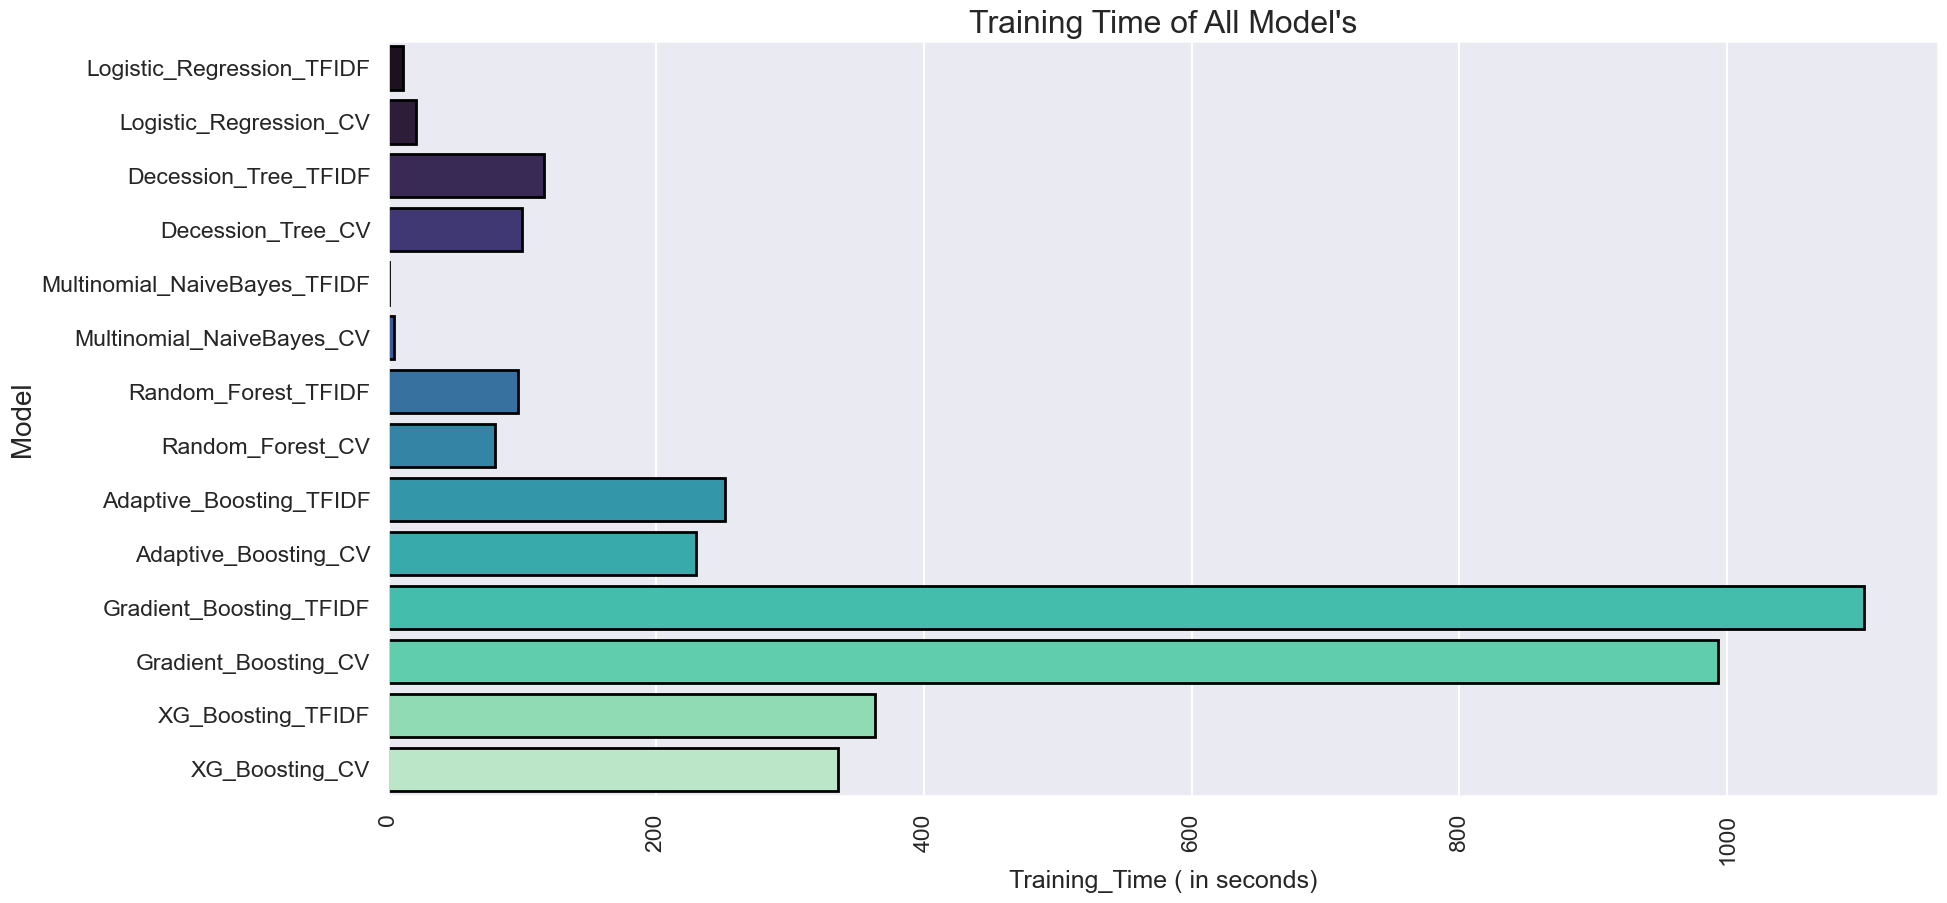

In [244]:
plt.figure(figsize=(20,10),dpi=100)
sns.set_theme(context='talk',style='darkgrid')
sns.set_context('talk')
sns.barplot(y=model_time.index, x=model_time['Training_Time ( in seconds)'],
            color='black',palette='mako', saturation=1, capsize=.2,linewidth=2,edgecolor='black')

plt.title("Training Time of All Model's",size=23);
plt.ylabel('Model',size=20);

plt.xticks(rotation=90);





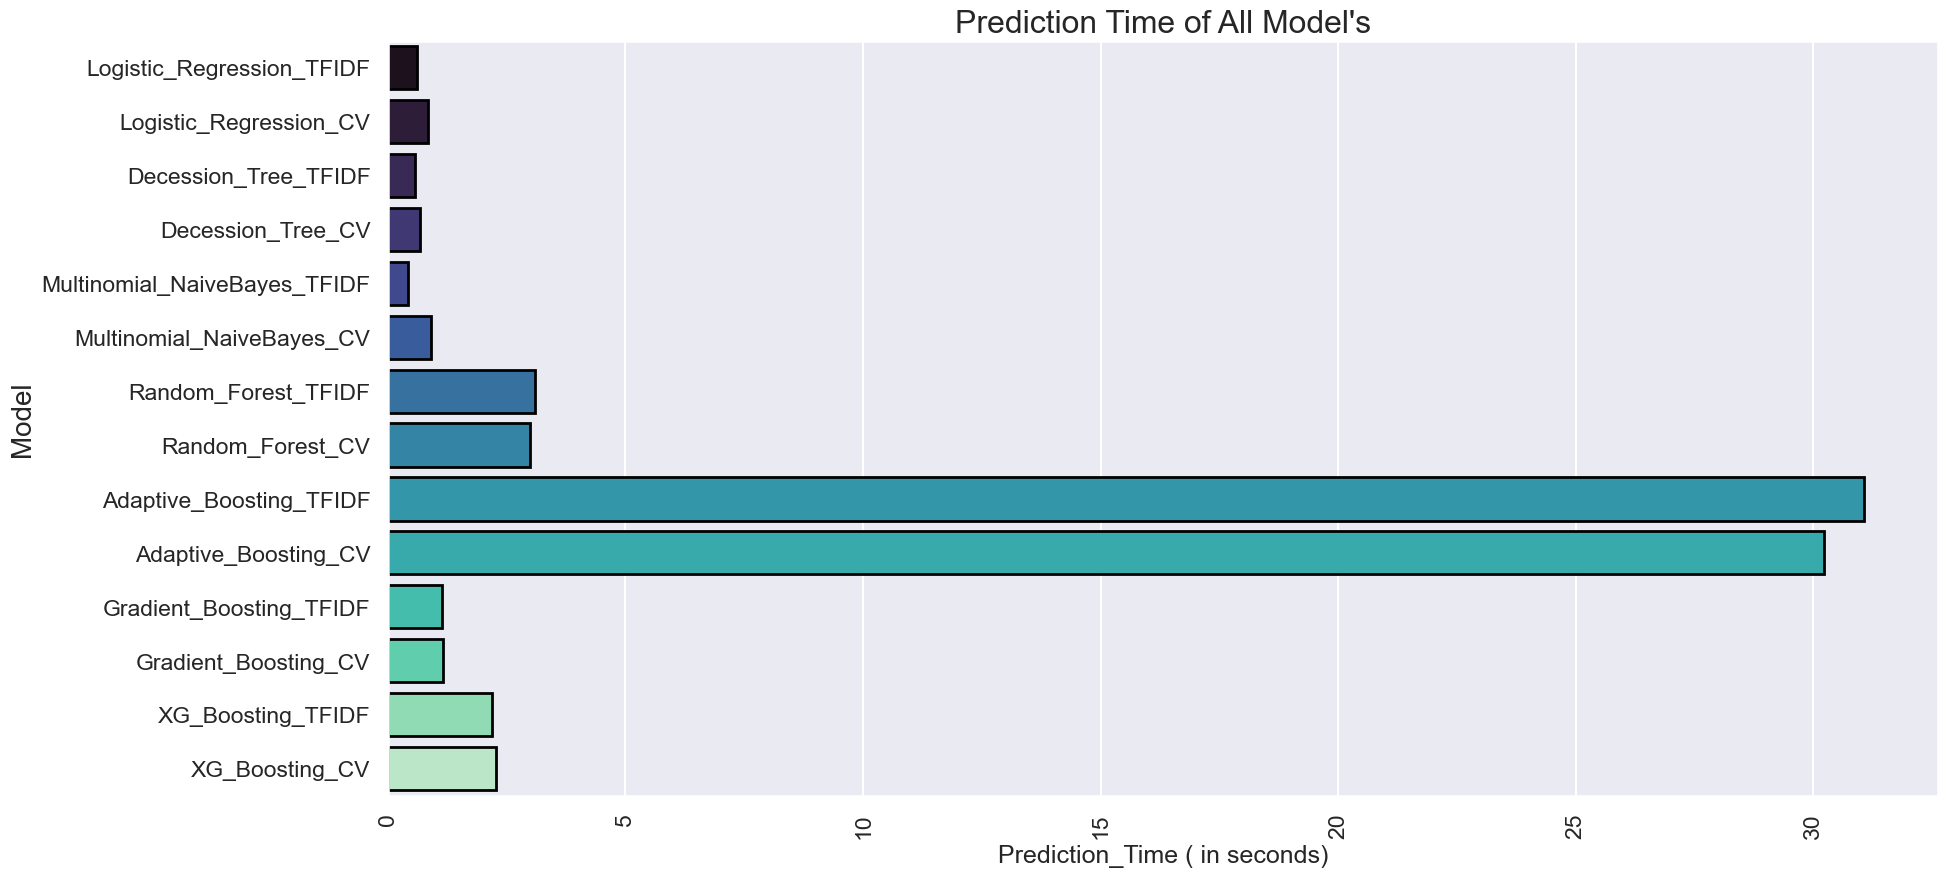

In [245]:
plt.figure(figsize=(20,10),dpi=100)
sns.set_theme(context='talk',style='darkgrid')
sns.barplot(y=model_time.index, x=model_time['Prediction_Time ( in seconds)'],
            color='black',palette='mako', saturation=1, capsize=.2,linewidth=2,edgecolor='black')

plt.title("Prediction Time of All Model's",size=23);
plt.ylabel('Model',size=20);

plt.xticks(rotation=90)
plt.show()

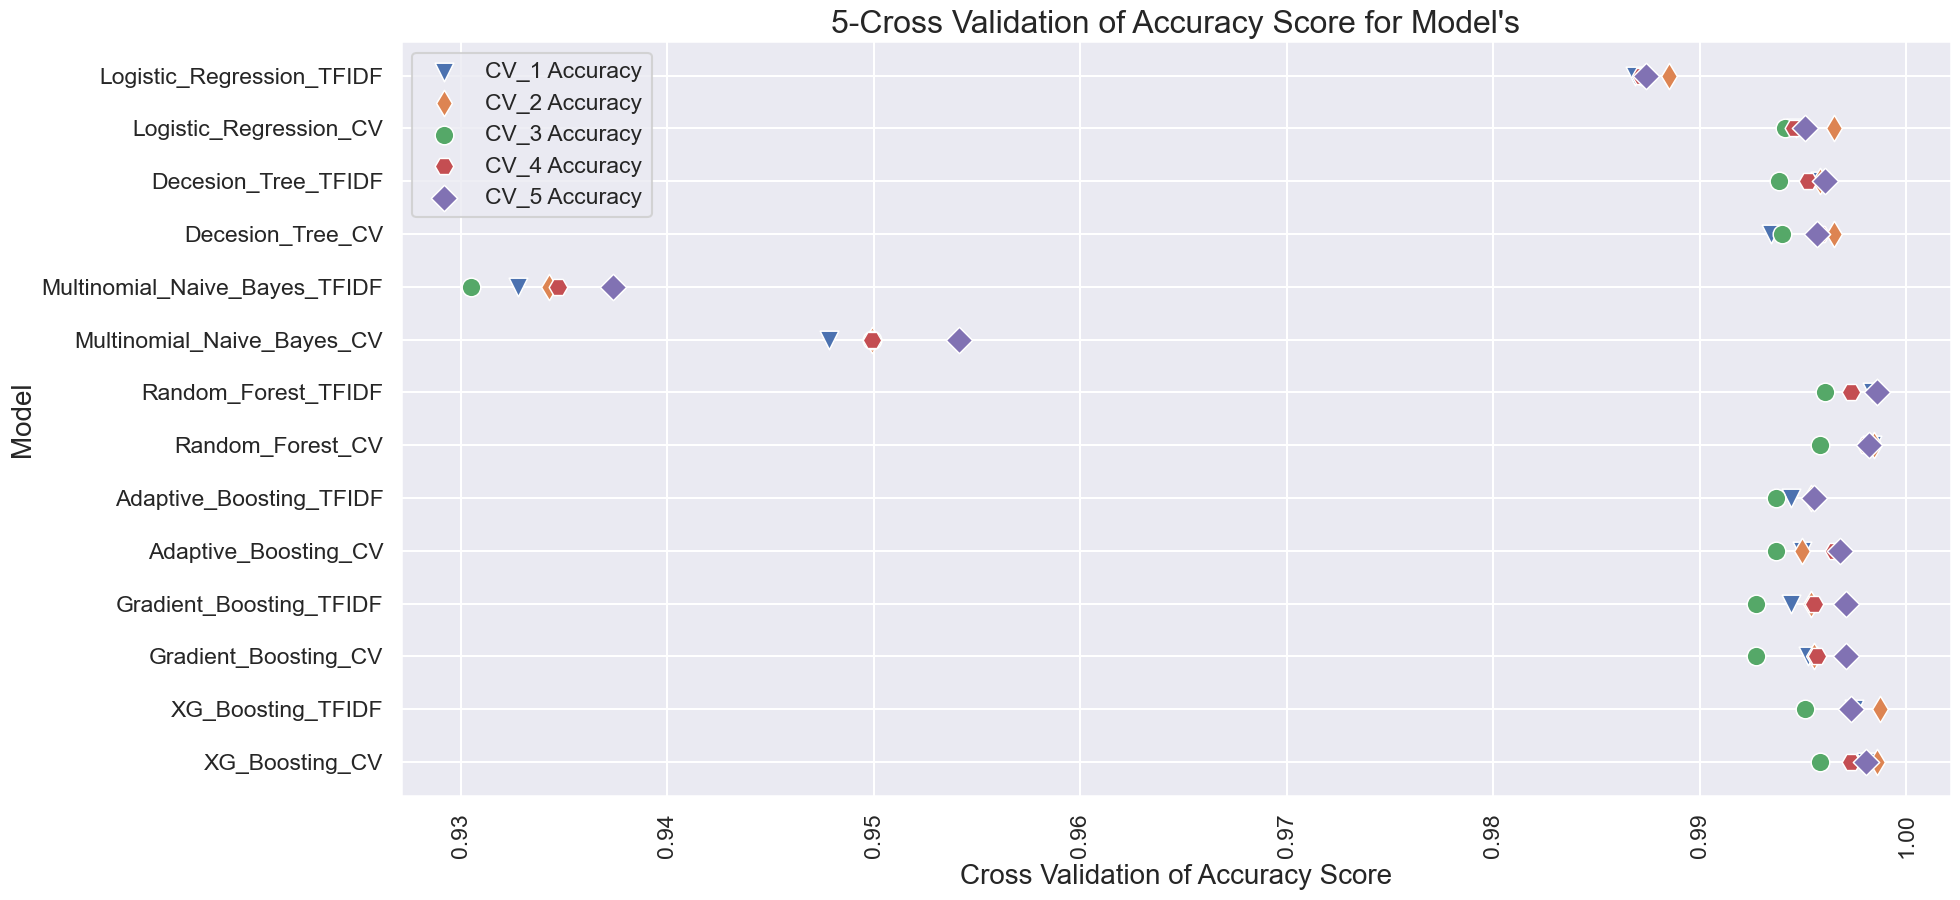

In [246]:
plt.figure(figsize=(20,10),dpi=100)
sns.set_theme(context='talk',style='darkgrid')
cross_val=model_cv_test_comparision.iloc[:,[0,1,2,3,4]]

sns.scatterplot(y=cross_val.index,x=cross_val['CV_1'],marker='v',s=180,label='CV_1 Accuracy')
sns.scatterplot(y=cross_val.index,x=cross_val['CV_2'],marker='d',s=180,label='CV_2 Accuracy')
sns.scatterplot(y=cross_val.index,x=cross_val['CV_3'],marker='o',s=180,label='CV_3 Accuracy')
sns.scatterplot(y=cross_val.index,x=cross_val['CV_4'],marker='H',s=180,label='CV_4 Accuracy')
sns.scatterplot(y=cross_val.index,x=cross_val['CV_5'],marker='D',s=180,label='CV_5 Accuracy')

plt.title("5-Cross Validation of Accuracy Score for Model's",size=23);
plt.ylabel('Model',size=20);
plt.xlabel("Cross Validation of Accuracy Score",size=20).set_position((0.5, 0.5))


plt.xticks(rotation=90)
plt.show()

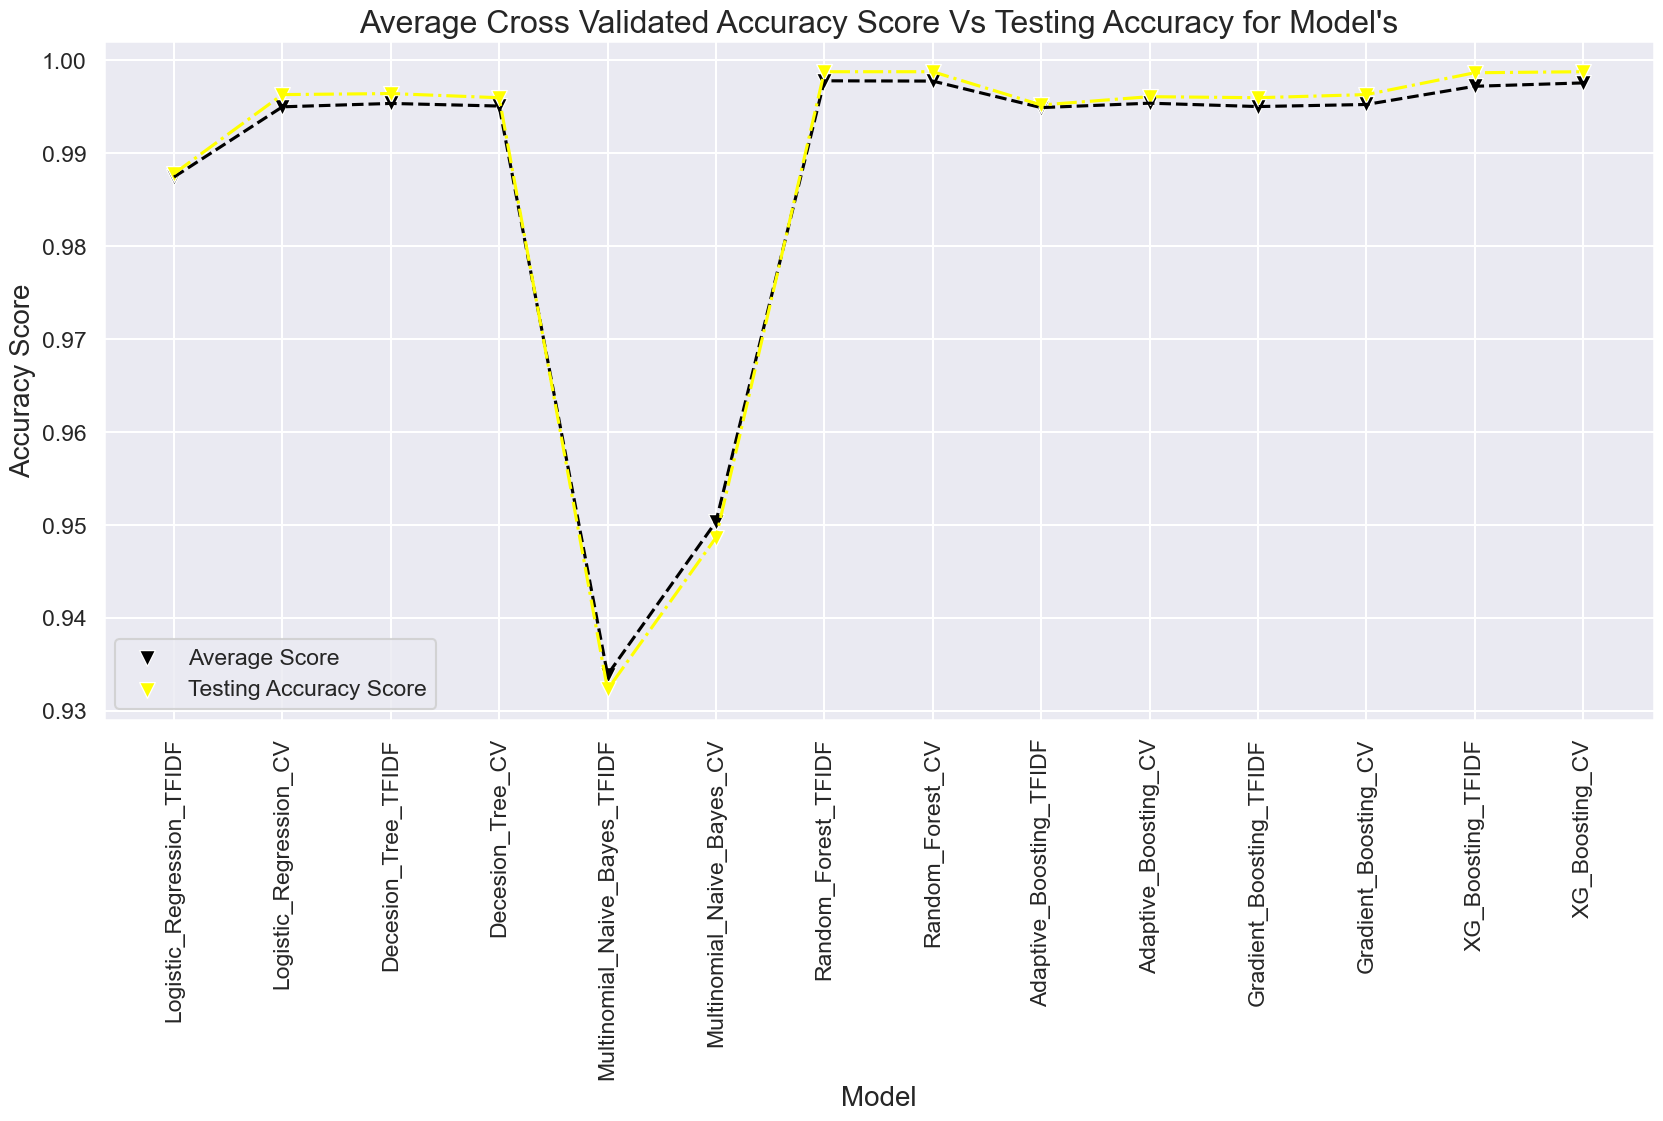

In [248]:
plt.figure(figsize=(20,9),dpi=100)
sns.set_theme(context='talk',style='darkgrid')

sns.lineplot(x=model_cv_test_comparision.index,y=model_cv_test_comparision['Average Score'],
             linestyle='--',color='black')

sns.scatterplot(x=model_cv_test_comparision.index,y=model_cv_test_comparision['Average Score'],label='Average Score',
             marker='v',color='black',s=130)

sns.lineplot(x=model_cv_test_comparision.index,y=model_cv_test_comparision['Testing Accuracy Score'],
             linestyle='-.',color='yellow')

sns.scatterplot(x=model_cv_test_comparision.index,y=model_cv_test_comparision['Testing Accuracy Score'],label='Testing Accuracy Score',
             marker='v',color='yellow',s=130)

plt.title("Average Cross Validated Accuracy Score Vs Testing Accuracy for Model's",size=23);
plt.ylabel('Accuracy Score',size=20);
plt.xlabel("Model",size=20).set_position((0.5, 0.5))


plt.xticks(rotation=90)
plt.show()

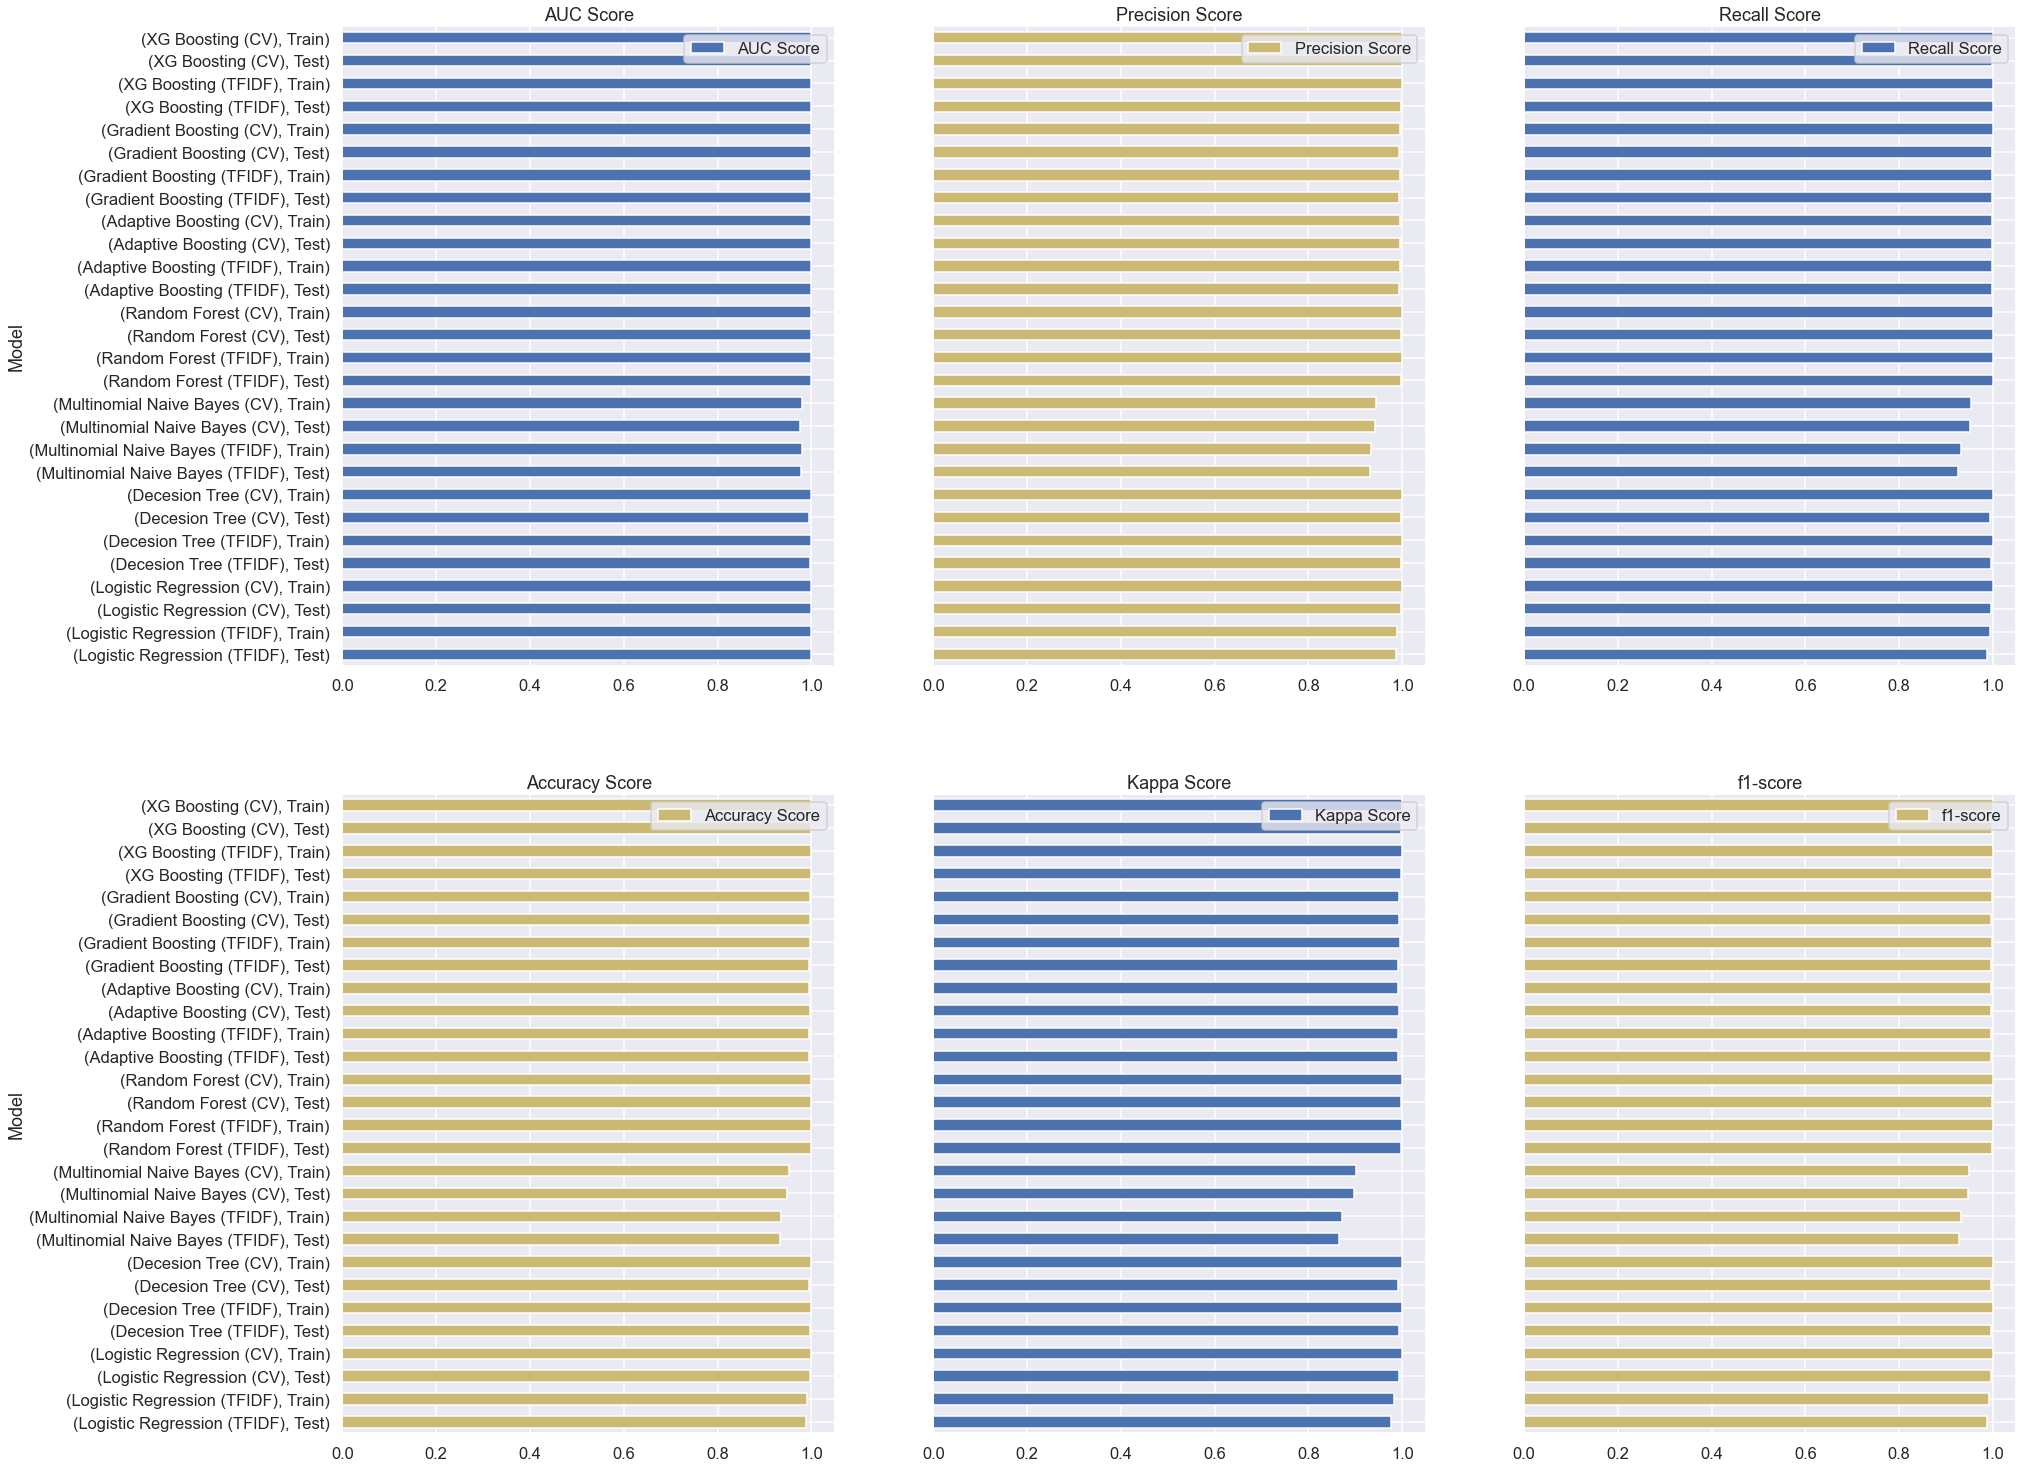

In [251]:
sns.set_theme(context='talk',style='darkgrid')

model_result.plot(kind='barh',subplots=True,sharey=True,sharex=False,layout=(3,3),figsize=(30,40),
                  legend=True,xlabel='Model',color=['b','y'])
plt.xticks(rotation=90)

plt.show()

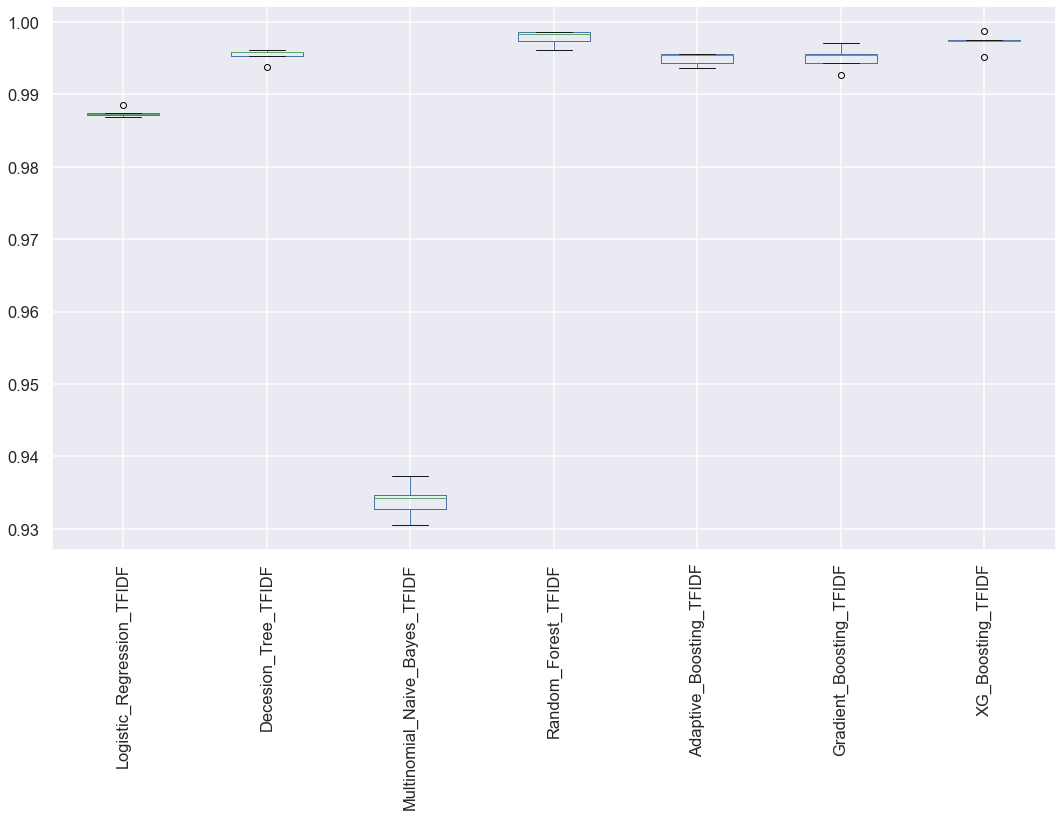

In [390]:
cross_validation_tfid_result = pd.concat(objs=[lg_tfid_cv, dt_tfid_cv,mnb_tfid_cv,rf_tfid_cv,
                                         ab_tfid_cv, gb_tfid_cv,xg_tfid_cv],
                                   axis=0)

model_cv_tfid_comparision=pd.concat(objs=[cross_validation_tfid_result,model_testing_accuracy_score],axis=1)

model_tfid_result=model_cv_tfid_comparision.head(7)

model_box=model_tfid_result.T.head(5)

sns.set_theme(context='talk',style='darkgrid')
model_box.plot(kind='box',figsize=(18,10),style={'color':'r'})
plt.xticks(rotation=90)
plt.show()

In [394]:
z

,Logistic_Regression_TFIDF,Decesion_Tree_TFIDF,Multinomial_Naive_Bayes_TFIDF,Random_Forest_TFIDF,Adaptive_Boosting_TFIDF,Gradient_Boosting_TFIDF,XG_Boosting_TFIDF
0,0.986855,0.995805,0.932737,0.998322,0.994406,0.994406,0.997483
1,0.988531,0.995804,0.934266,0.998601,0.995385,0.995385,0.998741
2,0.987273,0.993846,0.930490,0.996084,0.993706,0.992727,0.995105
3,0.987133,0.995245,0.934685,0.997343,0.995524,0.995524,0.997343
4,0.987413,0.996084,0.937343,0.998601,0.995524,0.997063,0.997343


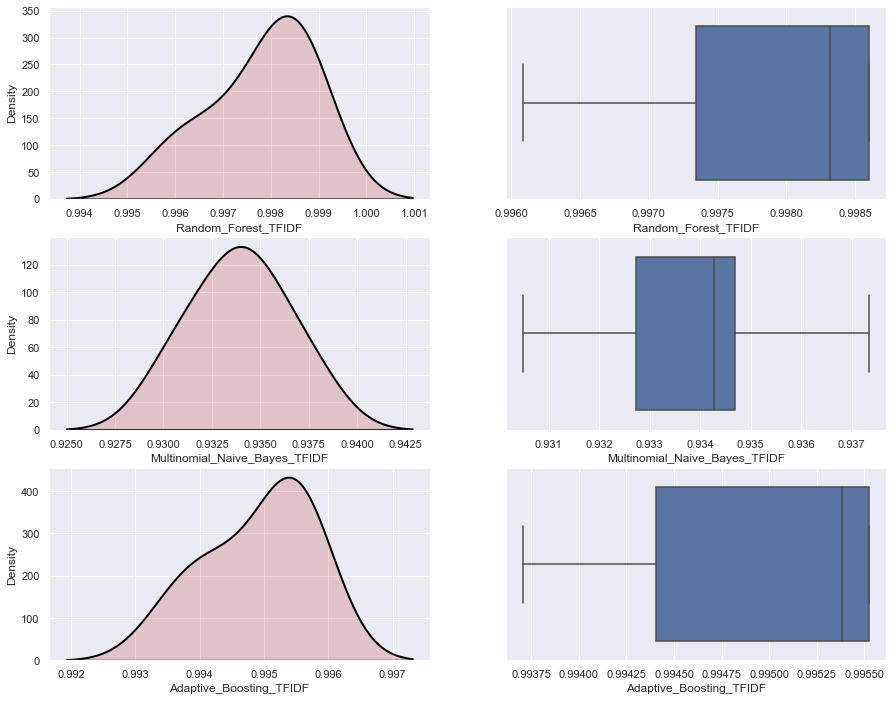

In [405]:
model_kde=model_box.reset_index(drop=True)

sns.set_theme(context='notebook',style='darkgrid')
plt.figure(figsize=(15,29))

# ax=plt.subplot2grid((7,2),(0,0))
# sns.kdeplot(z['Logistic_Regression_TFIDF'],shade=True,linewidth=2,edgecolor='black',color='r')

# ax_1=plt.subplot2grid((7,2),(0,1))
# sns.boxplot(z['Logistic_Regression_TFIDF'])

# ax_2=plt.subplot2grid((7,2),(1,0))
# sns.kdeplot(z['Decesion_Tree_TFIDF'],shade=True,linewidth=2,edgecolor='black',color='r')

# ax_3=plt.subplot2grid((7,2),(1,1))
# sns.boxplot(z['Decesion_Tree_TFIDF'])

ax_4=plt.subplot2grid((7,2),(2,0))
sns.kdeplot(z['Random_Forest_TFIDF'],shade=True,linewidth=2,edgecolor='black',color='r')

ax_5=plt.subplot2grid((7,2),(2,1))
sns.boxplot(z['Random_Forest_TFIDF'])

ax_6=plt.subplot2grid((7,2),(3,0))
sns.kdeplot(z['Multinomial_Naive_Bayes_TFIDF'],shade=True,linewidth=2,edgecolor='black',color='r')

ax_7=plt.subplot2grid((7,2),(3,1))
sns.boxplot(z['Multinomial_Naive_Bayes_TFIDF'])

ax_8=plt.subplot2grid((7,2),(4,0))
sns.kdeplot(z['Adaptive_Boosting_TFIDF'],shade=True,linewidth=2,edgecolor='black',color='r')

ax_9=plt.subplot2grid((7,2),(4,1))
sns.boxplot(z['Adaptive_Boosting_TFIDF'])

# ax_10=plt.subplot2grid((7,2),(5,0))
# sns.kdeplot(z['Gradient_Boosting_TFIDF'],shade=True,linewidth=2,edgecolor='black',color='r')

# ax_11=plt.subplot2grid((7,2),(5,1))
# sns.boxplot(z['Gradient_Boosting_TFIDF'])

# ax_12=plt.subplot2grid((7,2),(6,0))
# sns.kdeplot(z['XG_Boosting_TFIDF'],shade=True,linewidth=2,edgecolor='black',color='r')

# ax_13=plt.subplot2grid((7,2),(6,1))
# sns.boxplot(z['XG_Boosting_TFIDF'])

# plt.xticks(rotation=90)

plt.show()

In [24]:
data_new=pd.concat(objs=[df_text_tfid,d_news['Fake/Real']],axis=1,join='inner')
data_new

,abandon,abc,abe,abedin,ability,able,abortion,abroad,absolutely,abuse,...,young,youth,youtube,zealand,zero,zika,zimbabwe,zone,zuma,Fake/Real
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.049812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44684,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
44685,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
44686,0.106625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
44687,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Confidence Interval for Finalized Model

In [23]:
#Exe
X = count_arrayTF1

In [24]:
y = d_news['Fake/Real']

In [25]:
adb=AdaBoostClassifier()

In [26]:
skf = StratifiedKFold(n_splits=30)

f_tfid = list(cross_val_score(adb, X, y, cv=skf, scoring ='accuracy'))
f_tfid

[0.9959731543624161,
 0.9966442953020134,
 0.9979865771812081,
 0.9986577181208054,
 0.9946308724832215,
 0.9993288590604027,
 0.9993288590604027,
 0.9979865771812081,
 0.9973154362416108,
 0.9973154362416108,
 0.9966442953020134,
 0.991275167785235,
 0.9906040268456375,
 0.9892617449664429,
 0.9939597315436242,
 0.9939597315436242,
 0.9926174496644296,
 0.9979865771812081,
 0.9939597315436242,
 0.9926124916051041,
 0.9879113498992612,
 0.9892545332437878,
 0.9932840832773674,
 0.9973136333109469,
 0.9946272666218939,
 0.9939556749496307,
 0.9979852249832102,
 0.9946272666218939,
 0.9926124916051041,
 0.9919408999328408]

<AxesSubplot:ylabel='Density'>

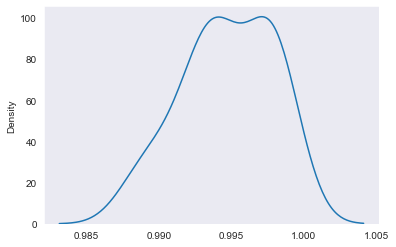

In [27]:
sns.kdeplot(f_tfid)

In [46]:
from scipy.stats import shapiro
alpha = 0.05 
t_stat, p_value = shapiro(f_tfid)
print(p_value)
if p_value > alpha:
    print("Failed to Reject Null Hypothesist || The data follows normal distribution")
else:
    print('Reject Null Hypothesist || The data does not follows normal distribution')
        

0.17943167686462402
Failed to Reject Null Hypothesist || The data follows normal distribution


In [44]:
Mu = np.mean(f_tfid)
n= 30
alpha = 0.05 
std = np.std(f_tfid)
z_crit = st.norm.isf(alpha/2)
ME = z_crit *std/np.sqrt(n)
upl = Mu+ME
lwl = Mu-ME
print('confidance intervel is', lwl,upl)

confidance intervel is 0.9958314631044642 0.9936059474063212


**- Pickling**

In [29]:
import pickle

In [32]:
filename = 'model_deploy'
pickle.dump(model_tfid_rf,open(filename,'wb'))

In [31]:
model_final=pickle.load(open('model_deploy','rb'))
model_final

RandomForestClassifier()

**- Deployment**

In [33]:
import gradio as gr

In [3]:
def predict_news(text):
    
    df=pd.DataFrame({'news':[text]})
    
    df['news'] = df['news'].apply(removespcl)
    
    df['news']= df['news'].apply(lambda x: word_tokenize(x))
    
    df['news'] = df['news'].apply(remove_stopwords)
    
    df['news'] = df['news'].apply(lambda x: lemmatizer(x))
    
    df['news'] = df['news'].apply(convert)
    
    df_matrix = tfid_vec.fit_transform(df['news'])
    
    df_arrayTF1 = df_matrix.toarray()
    
    prediction = model_final.predict(df_arrayTF1)
    
    if prediction == 1:
        prediction = 'Real News'
    else:
        prediction = 'Fake News'
        
    return prediction

iface = gr.Interface(fn=predict_news,inputs=['text'], outputs=['text'],theme='grass',title='-NEWS CLASSIFIER-',
                    height=100,article='**Note: Above News Classification is 99.3& - 99.5% accurate at the 95% C.I' )
iface.launch()

# Result

***Created News Classifier using Natural Language Processing –TFIDF and Machine Learning - Random Forest Model techniques with 99.5% Accuracy at 95% Confidence Interval. And created Web app GUI at Gradio.***